## Section 1: Data Import 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("="*80)
print("WORKFORCE PLANNING ANALYSIS - EXPLORATORY DATA ANALYSIS")
print("="*80)
print()


WORKFORCE PLANNING ANALYSIS - EXPLORATORY DATA ANALYSIS



In [31]:
import os
os.makedirs('outputs', exist_ok=True)


## Data Loading

In [32]:
def load_data(data_path='C:/Users/HP/Desktop/WORKFORCE PLANNING ANALYSIS/WorkForce-Planning-Analysis/data/processed/'):
    """
    Load all cleaned datasets
    
    Parameters:
    -----------
    data_path : str
        Path to the processed data directory
    
    Returns:
    --------
    dict : Dictionary containing all dataframes
    """
    print("📁 Loading Datasets...")
    print("-" * 80)
    
    datasets = {}
    
    try:
        # Load all datasets
        datasets['employees'] = pd.read_csv(f'{data_path}employees_master_cleaned.csv')
        datasets['departments'] = pd.read_csv(f'{data_path}department_master_cleaned.csv')
        datasets['attrition'] = pd.read_csv(f'{data_path}attrition_events_cleaned.csv')
        datasets['compensation'] = pd.read_csv(f'{data_path}compensation_history_cleaned.csv')
        datasets['performance'] = pd.read_csv(f'{data_path}performance_reviews_cleaned.csv')
        datasets['engagement'] = pd.read_csv(f'{data_path}engagement_surveys_cleaned.csv')
        datasets['attendance'] = pd.read_csv(f'{data_path}attendance_records_cleaned.csv')
        datasets['job_history'] = pd.read_csv(f'{data_path}job_history_cleaned.csv')
        datasets['training'] = pd.read_csv(f'{data_path}training_and_skills_cleaned.csv')
        
        # Print dataset shapes
        for name, df in datasets.items():
            print(f"✓ {name.upper()}: {df.shape[0]:,} rows × {df.shape[1]} columns")
        
        print()
        return datasets
    
    except FileNotFoundError as e:
        print(f"❌ Error loading data: {e}")
        print("Please ensure data files are in the correct directory.")
        return None

In [33]:
DATA_PATH = 'C:/Users/HP/Desktop/WORKFORCE PLANNING ANALYSIS/WorkForce-Planning-Analysis/data/processed/'

datasets = load_data(DATA_PATH)

datasets.keys()


📁 Loading Datasets...
--------------------------------------------------------------------------------
✓ EMPLOYEES: 5,000 rows × 20 columns
✓ DEPARTMENTS: 20 rows × 5 columns
✓ ATTRITION: 1,200 rows × 7 columns
✓ COMPENSATION: 15,073 rows × 8 columns
✓ PERFORMANCE: 10,048 rows × 7 columns
✓ ENGAGEMENT: 7,472 rows × 8 columns
✓ ATTENDANCE: 300,000 rows × 8 columns
✓ JOB_HISTORY: 10,010 rows × 9 columns
✓ TRAINING: 14,969 rows × 7 columns



dict_keys(['employees', 'departments', 'attrition', 'compensation', 'performance', 'engagement', 'attendance', 'job_history', 'training'])

## SECTION 2: DATA OVERVIEW & SUMMARY STATISTICS


In [34]:
def data_overview(datasets):
    """Generate comprehensive data overview"""
    
    print("\n" + "="*80)
    print("📊 DATA OVERVIEW & SUMMARY STATISTICS")
    print("="*80)
    
    employees = datasets['employees']
    attrition = datasets['attrition']
    
    # Basic metrics
    total_employees = len(employees)
    attrited_employees = len(attrition)
    active_employees = total_employees - attrited_employees
    attrition_rate = (attrited_employees / total_employees) * 100
    
    print(f"\n🔢 KEY METRICS:")
    print(f"   • Total Employees: {total_employees:,}")
    print(f"   • Active Employees: {active_employees:,} ({(active_employees/total_employees)*100:.1f}%)")
    print(f"   • Attrited Employees: {attrited_employees:,}")
    print(f"   • Attrition Rate: {attrition_rate:.2f}%")
    
    # Age statistics
    print(f"\n👥 AGE DISTRIBUTION:")
    print(f"   • Mean Age: {employees['age'].mean():.1f} years")
    print(f"   • Median Age: {employees['age'].median():.1f} years")
    print(f"   • Age Range: {employees['age'].min():.0f} - {employees['age'].max():.0f} years")
    
    # Tenure statistics
    if 'tenure_years' in employees.columns:
        print(f"\n📅 TENURE DISTRIBUTION:")
        print(f"   • Mean Tenure: {employees['tenure_years'].mean():.2f} years")
        print(f"   • Median Tenure: {employees['tenure_years'].median():.2f} years")
        print(f"   • Max Tenure: {employees['tenure_years'].max():.2f} years")
    
    # Department distribution
    if 'department_id' in employees.columns:
        dept_counts = employees['department_id'].value_counts()
        print(f"\n🏢 DEPARTMENT DISTRIBUTION:")
        print(f"   • Number of Departments: {dept_counts.nunique()}")
        print(f"   • Largest Department: {dept_counts.iloc[0]} employees")
        print(f"   • Smallest Department: {dept_counts.iloc[-1]} employees")
    
    print()
    return {
        'total_employees': total_employees,
        'attrited_employees': attrited_employees,
        'active_employees': active_employees,
        'attrition_rate': attrition_rate
    }


In [35]:
summary = data_overview(datasets)
print(summary)


📊 DATA OVERVIEW & SUMMARY STATISTICS

🔢 KEY METRICS:
   • Total Employees: 5,000
   • Active Employees: 3,800 (76.0%)
   • Attrited Employees: 1,200
   • Attrition Rate: 24.00%

👥 AGE DISTRIBUTION:
   • Mean Age: 40.2 years
   • Median Age: 40.0 years
   • Age Range: 21 - 59 years

📅 TENURE DISTRIBUTION:
   • Mean Tenure: 8.49 years
   • Median Tenure: 8.55 years
   • Max Tenure: 15.00 years

🏢 DEPARTMENT DISTRIBUTION:
   • Number of Departments: 18
   • Largest Department: 275 employees
   • Smallest Department: 231 employees

{'total_employees': 5000, 'attrited_employees': 1200, 'active_employees': 3800, 'attrition_rate': 24.0}


## SECTION 3: ATTRITION ANALYSIS

In [36]:
def analyze_attrition(datasets):
    """Comprehensive attrition analysis with visualizations"""
    
    print("\n" + "="*80)
    print("📉 ATTRITION ANALYSIS")
    print("="*80)
    
    employees = datasets['employees']
    attrition = datasets['attrition']
    
    # Merge attrition with employee data
    emp_with_attrition = employees.merge(
        attrition[['employee_id']], 
        on='employee_id', 
        how='left', 
        indicator=True
    )
    emp_with_attrition['attrited'] = emp_with_attrition['_merge'] == 'both'
    emp_with_attrition['status'] = emp_with_attrition['attrited'].map({True: 'Attrited', False: 'Active'})
    
    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Workforce Attrition Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Overall Attrition Rate
    ax1 = axes[0, 0]
    attrition_counts = emp_with_attrition['status'].value_counts()
    colors = ['#2ecc71', '#e74c3c']
    ax1.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
    ax1.set_title('Overall Attrition Rate', fontweight='bold', fontsize=12)
    
    # 2. Attrition by Department
    if 'department_id' in employees.columns and 'department_name' in datasets['departments'].columns:
        emp_dept = emp_with_attrition.merge(datasets['departments'], on='department_id', how='left')
        dept_attrition = emp_dept.groupby('department_name')['attrited'].agg(['sum', 'count'])
        dept_attrition['rate'] = (dept_attrition['sum'] / dept_attrition['count'] * 100)
        dept_attrition = dept_attrition.sort_values('rate', ascending=True).tail(10)
        
        ax2 = axes[0, 1]
        ax2.barh(dept_attrition.index, dept_attrition['rate'], color='coral')
        ax2.set_xlabel('Attrition Rate (%)')
        ax2.set_title('Top 10 Departments by Attrition Rate', fontweight='bold', fontsize=12)
        ax2.grid(axis='x', alpha=0.3)
    
    # 3. Attrition by Age Group
    if 'age_group' in emp_with_attrition.columns:
        age_attrition = emp_with_attrition.groupby('age_group')['attrited'].agg(['sum', 'count'])
        age_attrition['rate'] = (age_attrition['sum'] / age_attrition['count'] * 100)
        
        ax3 = axes[0, 2]
        age_attrition['rate'].plot(kind='bar', ax=ax3, color='steelblue')
        ax3.set_ylabel('Attrition Rate (%)')
        ax3.set_title('Attrition Rate by Age Group', fontweight='bold', fontsize=12)
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
        ax3.grid(axis='y', alpha=0.3)
    
    # 4. Attrition by Tenure
    if 'tenure_years' in emp_with_attrition.columns:
        emp_with_attrition['tenure_group'] = pd.cut(
            emp_with_attrition['tenure_years'], 
            bins=[0, 2, 5, 10, 20, 100],
            labels=['0-2 yrs', '2-5 yrs', '5-10 yrs', '10-20 yrs', '20+ yrs']
        )
        tenure_attrition = emp_with_attrition.groupby('tenure_group')['attrited'].agg(['sum', 'count'])
        tenure_attrition['rate'] = (tenure_attrition['sum'] / tenure_attrition['count'] * 100)
        
        ax4 = axes[1, 0]
        tenure_attrition['rate'].plot(kind='bar', ax=ax4, color='mediumseagreen')
        ax4.set_ylabel('Attrition Rate (%)')
        ax4.set_title('Attrition Rate by Tenure', fontweight='bold', fontsize=12)
        ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
        ax4.grid(axis='y', alpha=0.3)
    
    # 5. Attrition Reasons
    if 'reason' in attrition.columns:
        ax5 = axes[1, 1]
        reason_counts = attrition['reason'].value_counts().head(8)
        ax5.barh(reason_counts.index, reason_counts.values, color='tomato')
        ax5.set_xlabel('Number of Employees')
        ax5.set_title('Top 8 Attrition Reasons', fontweight='bold', fontsize=12)
        ax5.grid(axis='x', alpha=0.3)
    
    # 6. Gender-wise Attrition
    if 'gender' in emp_with_attrition.columns:
        gender_attrition = emp_with_attrition.groupby('gender')['attrited'].agg(['sum', 'count'])
        gender_attrition['rate'] = (gender_attrition['sum'] / gender_attrition['count'] * 100)
        
        ax6 = axes[1, 2]
        gender_attrition['rate'].plot(kind='bar', ax=ax6, color=['#3498db', '#e67e22'])
        ax6.set_ylabel('Attrition Rate (%)')
        ax6.set_title('Attrition Rate by Gender', fontweight='bold', fontsize=12)
        ax6.set_xticklabels(ax6.get_xticklabels(), rotation=0)
        ax6.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/attrition_analysis_dashboard.png', dpi=300, bbox_inches='tight')
    print("✓ Attrition Analysis Dashboard saved!")
    
    return emp_with_attrition



📉 ATTRITION ANALYSIS
✓ Attrition Analysis Dashboard saved!


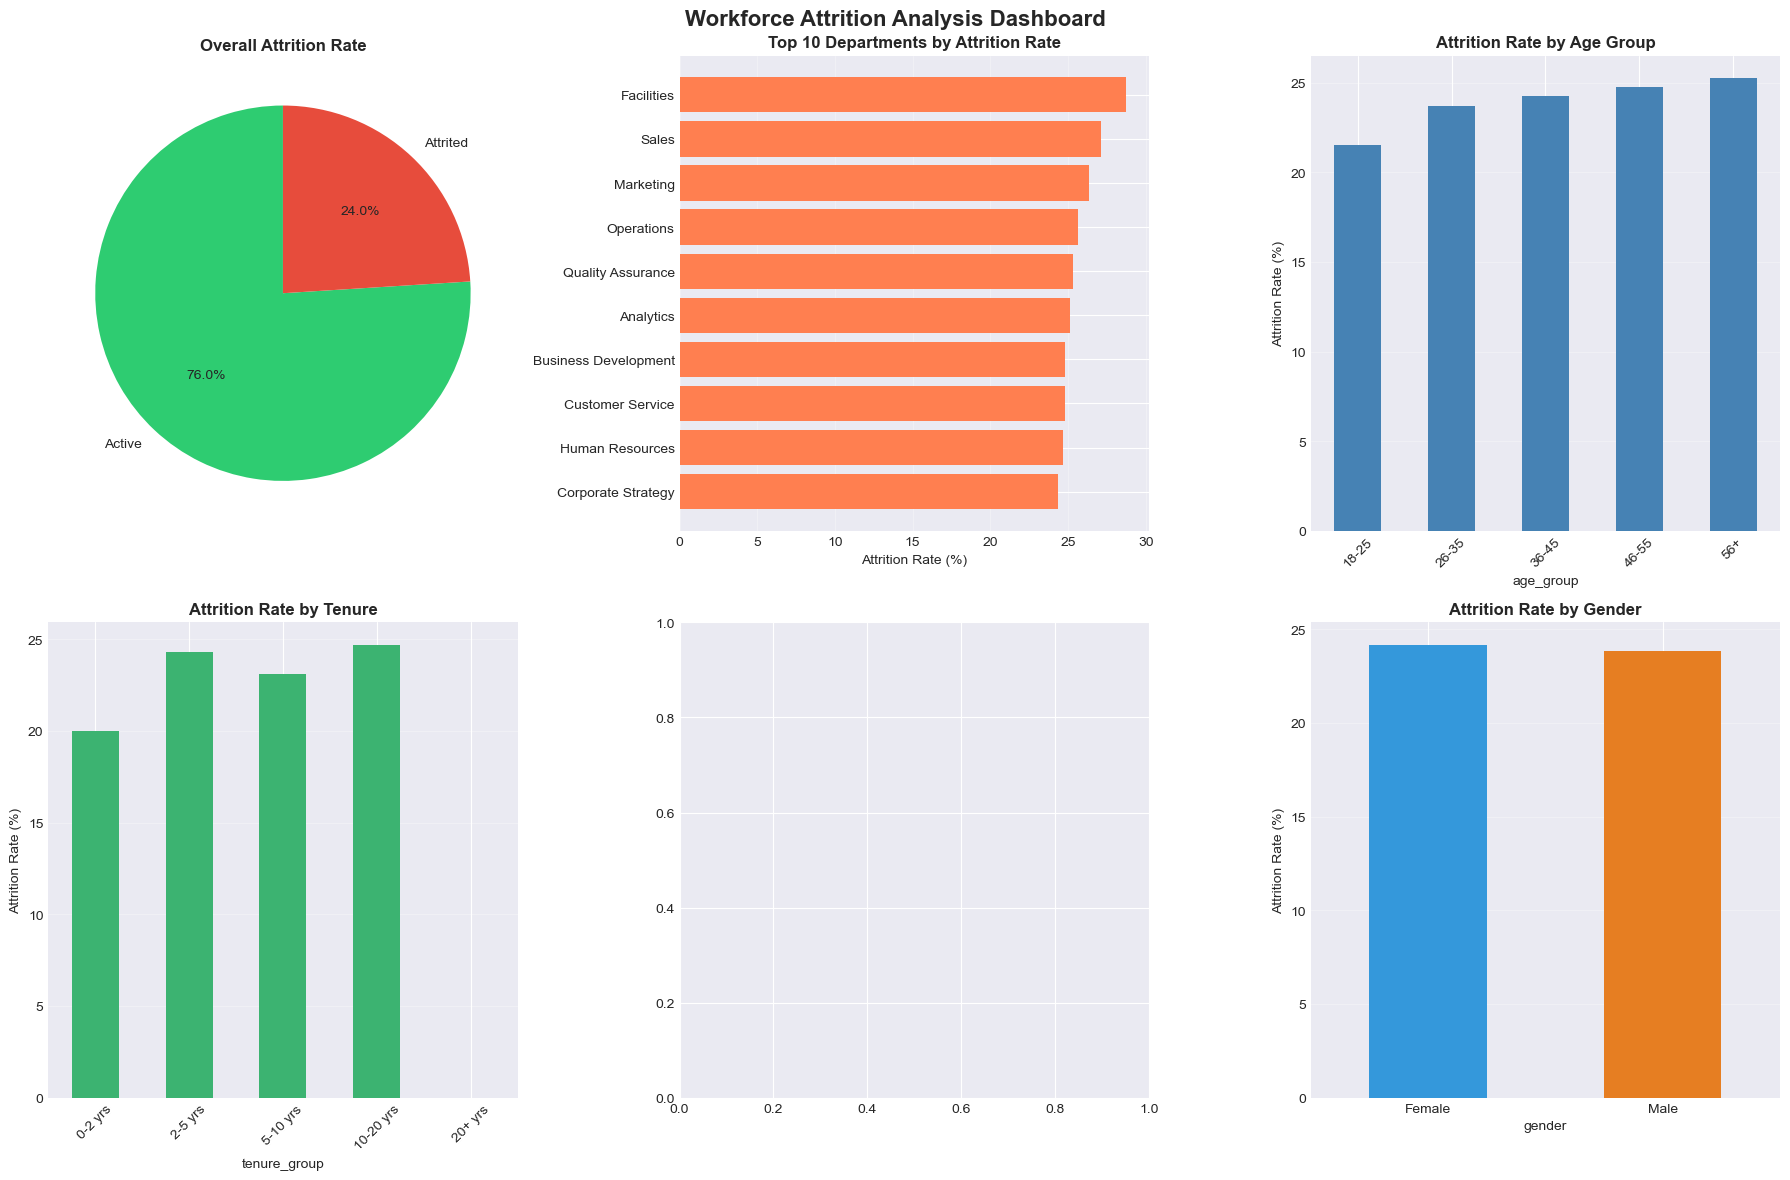

In [37]:
emp_with_attrition = analyze_attrition(datasets)


## SECTION 4: EMPLOYEE DEMOGRAPHICS


In [38]:
def analyze_demographics(datasets):
    """Analyze employee demographics"""
    
    print("\n" + "="*80)
    print("👥 EMPLOYEE DEMOGRAPHICS ANALYSIS")
    print("="*80)
    
    employees = datasets['employees']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Employee Demographics Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Age Distribution
    ax1 = axes[0, 0]
    ax1.hist(employees['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.axvline(employees['age'].mean(), color='red', linestyle='--', label=f'Mean: {employees["age"].mean():.1f}')
    ax1.axvline(employees['age'].median(), color='green', linestyle='--', label=f'Median: {employees["age"].median():.1f}')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Age Distribution', fontweight='bold', fontsize=12)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Gender Distribution
    if 'gender' in employees.columns:
        ax2 = axes[0, 1]
        gender_counts = employees['gender'].value_counts()
        ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
                colors=['#3498db', '#e67e22', '#95a5a6'], startangle=90)
        ax2.set_title('Gender Distribution', fontweight='bold', fontsize=12)
    
    # 3. Tenure Distribution
    if 'tenure_years' in employees.columns:
        ax3 = axes[0, 2]
        ax3.hist(employees['tenure_years'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
        ax3.axvline(employees['tenure_years'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {employees["tenure_years"].mean():.1f}')
        ax3.set_xlabel('Tenure (Years)')
        ax3.set_ylabel('Frequency')
        ax3.set_title('Tenure Distribution', fontweight='bold', fontsize=12)
        ax3.legend()
        ax3.grid(alpha=0.3)
    
    # 4. Marital Status
    if 'marital_status' in employees.columns:
        ax4 = axes[1, 0]
        marital_counts = employees['marital_status'].value_counts()
        ax4.bar(marital_counts.index, marital_counts.values, color='mediumseagreen')
        ax4.set_ylabel('Count')
        ax4.set_title('Marital Status Distribution', fontweight='bold', fontsize=12)
        ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
        ax4.grid(axis='y', alpha=0.3)
    
    # 5. Education Level
    if 'education' in employees.columns:
        ax5 = axes[1, 1]
        edu_counts = employees['education'].value_counts()
        ax5.barh(edu_counts.index, edu_counts.values, color='plum')
        ax5.set_xlabel('Count')
        ax5.set_title('Education Level Distribution', fontweight='bold', fontsize=12)
        ax5.grid(axis='x', alpha=0.3)
    
    # 6. Department Size
    if 'department_id' in employees.columns:
        emp_dept = employees.merge(datasets['departments'], on='department_id', how='left')
        ax6 = axes[1, 2]
        dept_counts = emp_dept['department_name'].value_counts().head(10)
        ax6.barh(dept_counts.index, dept_counts.values, color='coral')
        ax6.set_xlabel('Number of Employees')
        ax6.set_title('Top 10 Departments by Size', fontweight='bold', fontsize=12)
        ax6.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/demographics_dashboard.png', dpi=300, bbox_inches='tight')
    print("✓ Demographics Dashboard saved!")



👥 EMPLOYEE DEMOGRAPHICS ANALYSIS
✓ Demographics Dashboard saved!


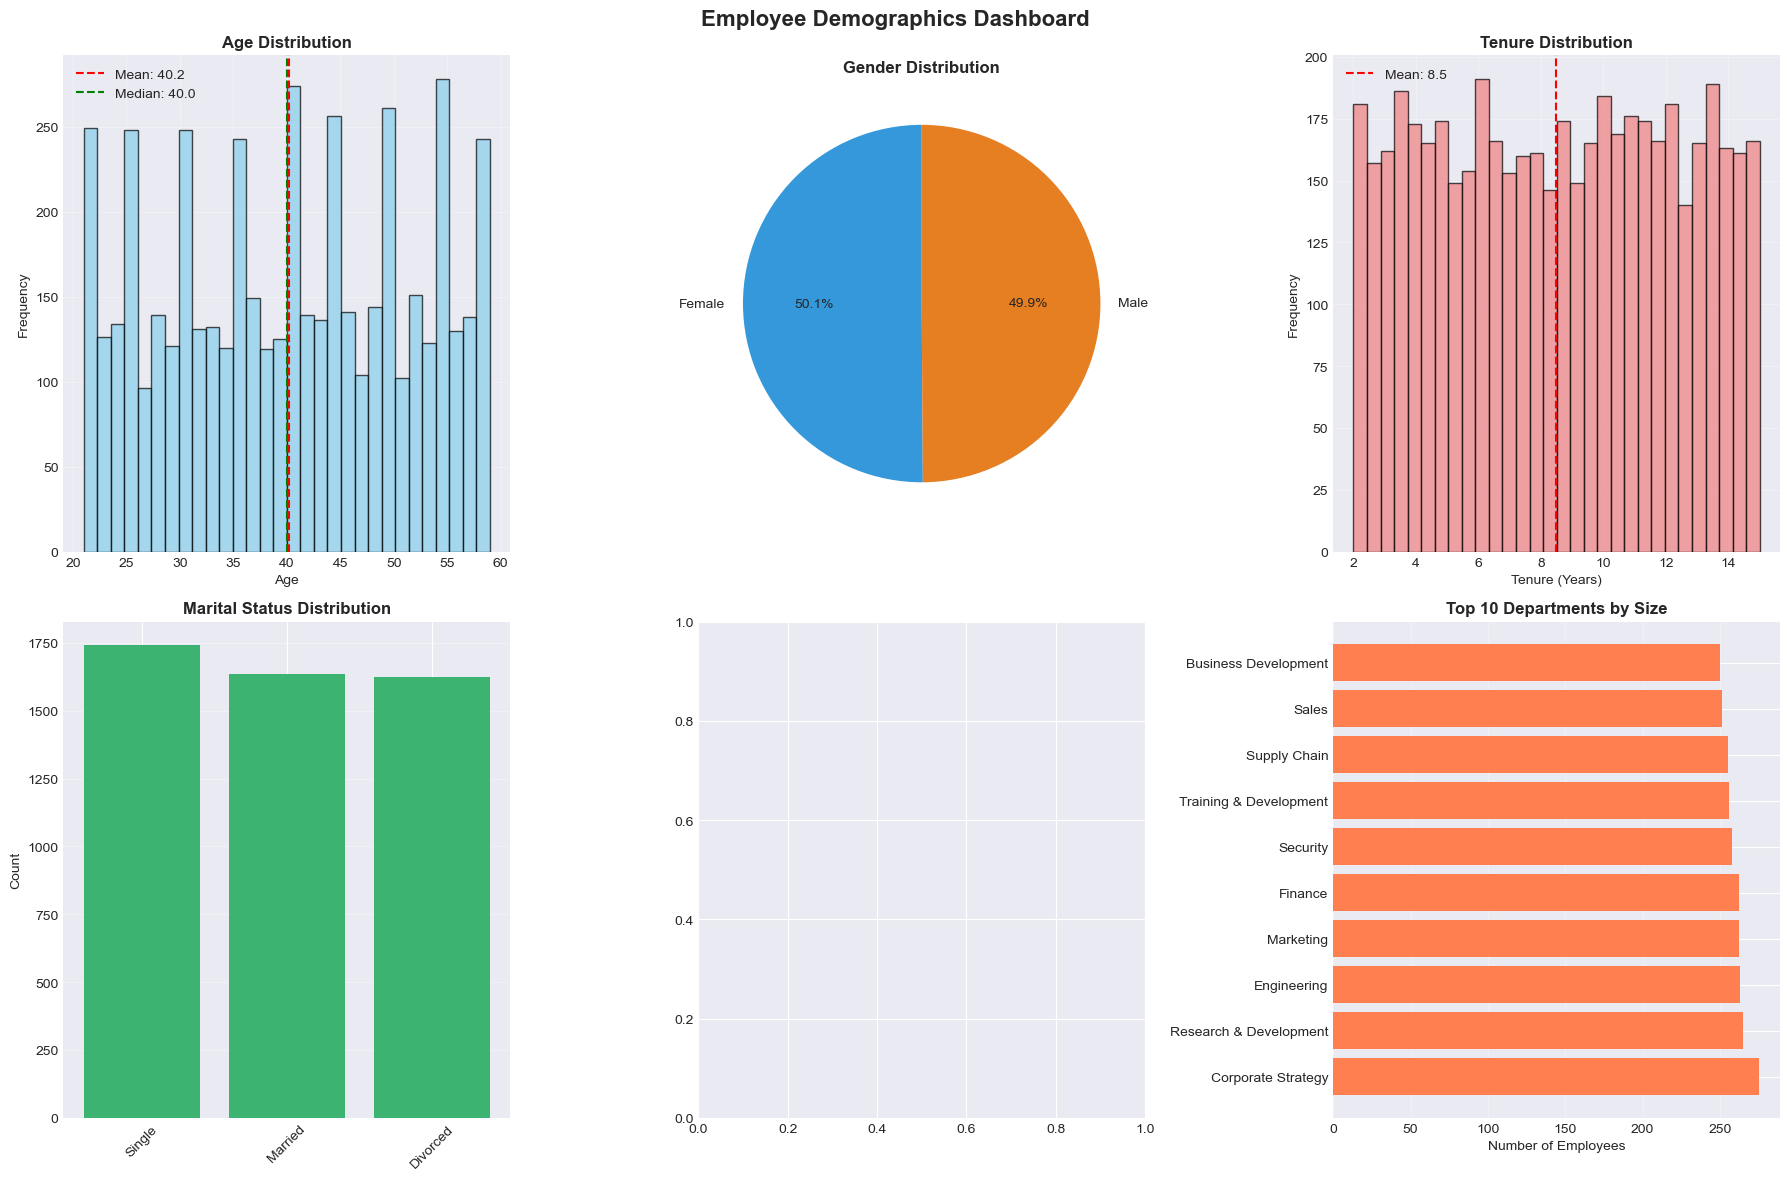

In [39]:
analyze_demographics(datasets)


## SECTION 5: PERFORMANCE ANALYSIS

In [40]:
def analyze_performance(datasets):
    """Analyze employee performance metrics"""
    
    print("\n" + "="*80)
    print("⭐ PERFORMANCE ANALYSIS")
    print("="*80)
    
    performance = datasets['performance']
    employees = datasets['employees']
    
    # Get latest performance for each employee
    latest_perf = performance.sort_values('review_date').groupby('employee_id').last().reset_index()
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Employee Performance Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Performance Rating Distribution
    if 'performance_rating' in latest_perf.columns:
        ax1 = axes[0, 0]
        rating_counts = latest_perf['performance_rating'].value_counts().sort_index()
        ax1.bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black')
        ax1.set_xlabel('Performance Rating')
        ax1.set_ylabel('Number of Employees')
        ax1.set_title('Performance Rating Distribution', fontweight='bold', fontsize=12)
        ax1.grid(axis='y', alpha=0.3)
    
    # 2. Goal Completion Rate
    if 'goal_completion_rate' in latest_perf.columns:
        ax2 = axes[0, 1]
        ax2.hist(latest_perf['goal_completion_rate'], bins=20, color='mediumseagreen', 
                edgecolor='black', alpha=0.7)
        ax2.axvline(latest_perf['goal_completion_rate'].mean(), color='red', linestyle='--',
                   label=f'Mean: {latest_perf["goal_completion_rate"].mean():.1f}%')
        ax2.set_xlabel('Goal Completion Rate (%)')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Goal Completion Rate Distribution', fontweight='bold', fontsize=12)
        ax2.legend()
        ax2.grid(alpha=0.3)
    
    # 3. Performance vs Attrition
    if 'performance_rating' in latest_perf.columns:
        emp_perf = employees.merge(latest_perf[['employee_id', 'performance_rating']], 
                                   on='employee_id', how='left')
        attrition = datasets['attrition']
        emp_perf['attrited'] = emp_perf['employee_id'].isin(attrition['employee_id'])
        
        ax3 = axes[0, 2]
        perf_attrition = emp_perf.groupby('performance_rating')['attrited'].agg(['sum', 'count'])
        perf_attrition['rate'] = (perf_attrition['sum'] / perf_attrition['count'] * 100)
        ax3.plot(perf_attrition.index, perf_attrition['rate'], marker='o', 
                linewidth=2, markersize=8, color='crimson')
        ax3.set_xlabel('Performance Rating')
        ax3.set_ylabel('Attrition Rate (%)')
        ax3.set_title('Attrition Rate by Performance Rating', fontweight='bold', fontsize=12)
        ax3.grid(alpha=0.3)
    
    # 4. Promotions Recommended
    if 'promotion_recommended' in latest_perf.columns:
        ax4 = axes[1, 0]
        promo_counts = latest_perf['promotion_recommended'].value_counts()
        ax4.pie(promo_counts, labels=['Not Recommended', 'Recommended'], autopct='%1.1f%%',
               colors=['#e74c3c', '#2ecc71'], startangle=90)
        ax4.set_title('Promotion Recommendations', fontweight='bold', fontsize=12)
    
    # 5. Performance Trend
    if 'review_date' in performance.columns and 'performance_rating' in performance.columns:
        ax5 = axes[1, 1]
        performance['review_date'] = pd.to_datetime(performance['review_date'])
        performance['year'] = performance['review_date'].dt.year
        perf_trend = performance.groupby('year')['performance_rating'].mean()
        ax5.plot(perf_trend.index, perf_trend.values, marker='o', linewidth=2, 
                markersize=8, color='purple')
        ax5.set_xlabel('Year')
        ax5.set_ylabel('Average Performance Rating')
        ax5.set_title('Performance Rating Trend Over Time', fontweight='bold', fontsize=12)
        ax5.grid(alpha=0.3)
    
    # 6. Performance by Department
    if 'performance_rating' in latest_perf.columns and 'department_id' in employees.columns:
        emp_perf_dept = latest_perf.merge(employees[['employee_id', 'department_id']], 
                                         on='employee_id', how='left')
        emp_perf_dept = emp_perf_dept.merge(datasets['departments'], on='department_id', how='left')
        dept_perf = emp_perf_dept.groupby('department_name')['performance_rating'].mean().sort_values(ascending=True).tail(10)
        
        ax6 = axes[1, 2]
        ax6.barh(dept_perf.index, dept_perf.values, color='teal')
        ax6.set_xlabel('Average Performance Rating')
        ax6.set_title('Top 10 Departments by Performance', fontweight='bold', fontsize=12)
        ax6.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/performance_dashboard.png', dpi=300, bbox_inches='tight')
    print("✓ Performance Dashboard saved!")



⭐ PERFORMANCE ANALYSIS
✓ Performance Dashboard saved!


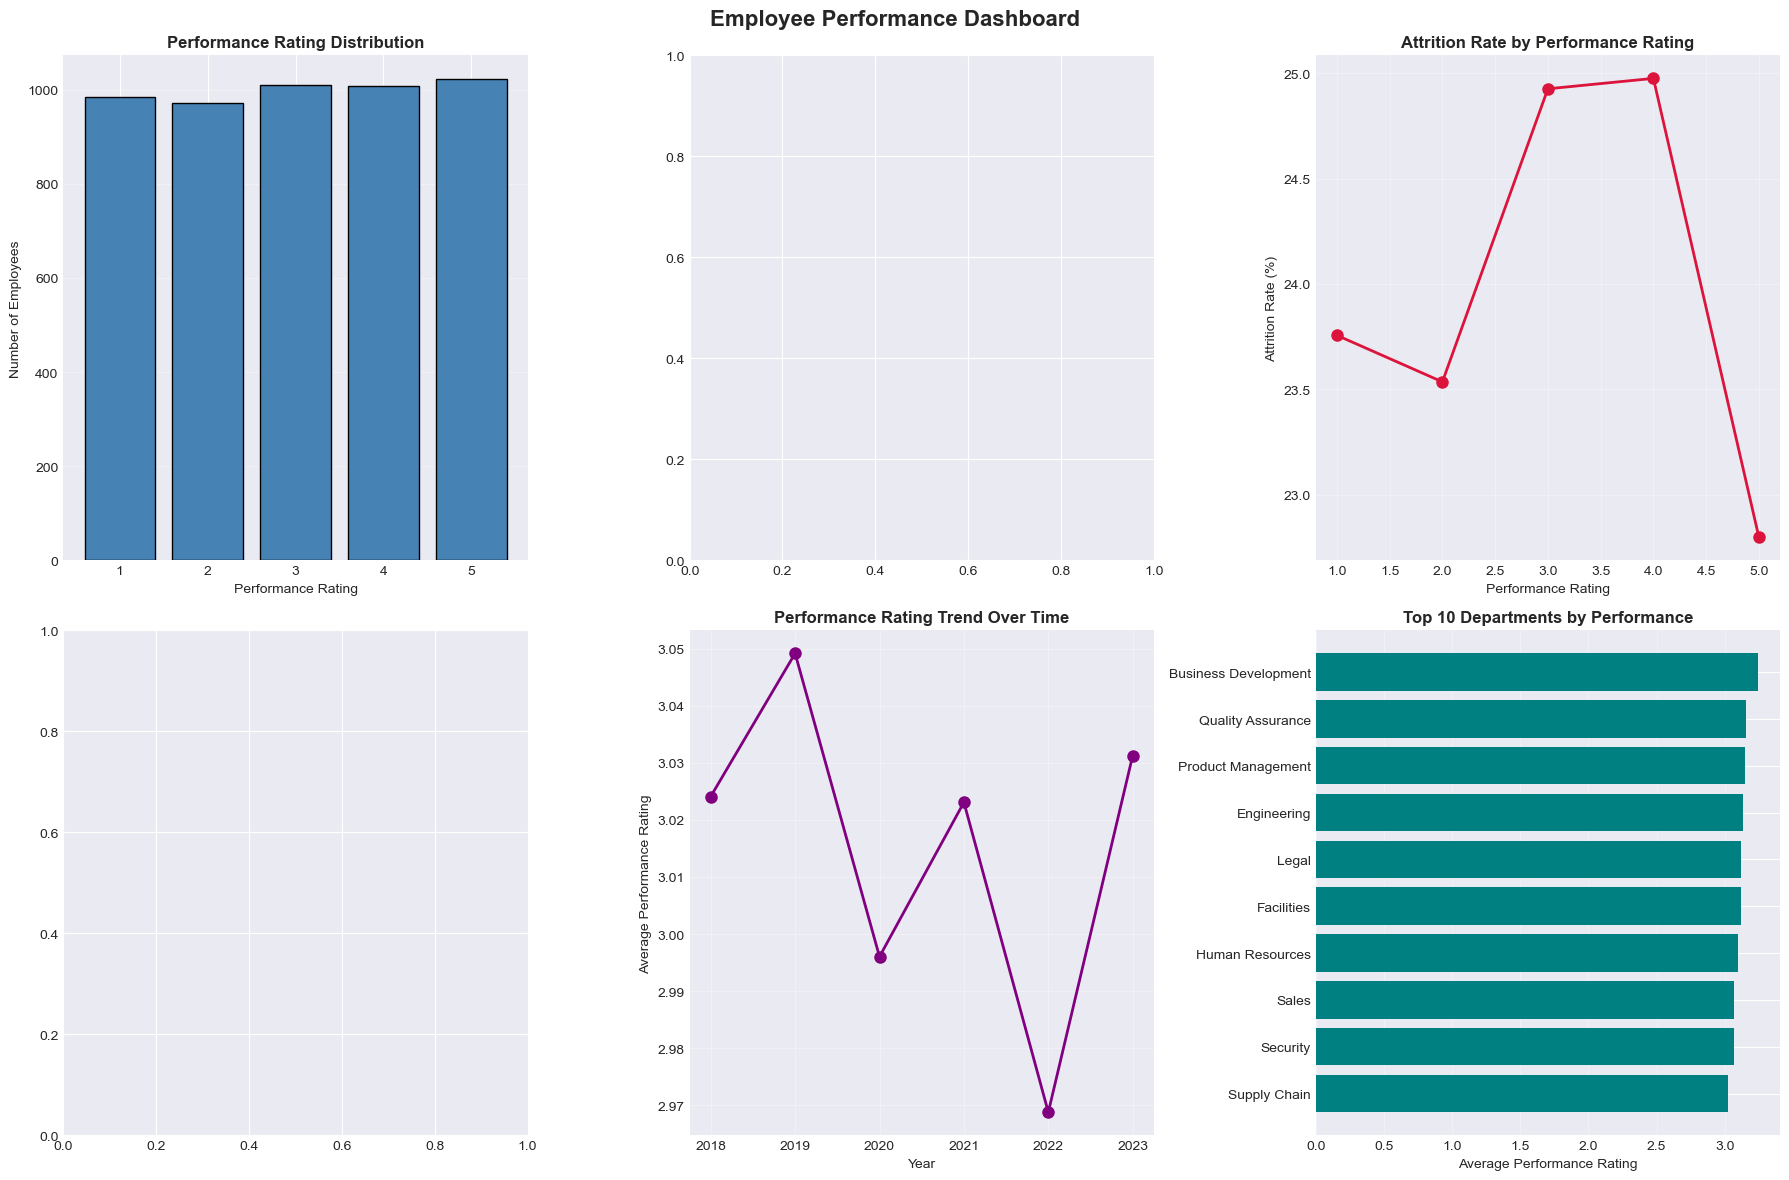

In [41]:
analyze_performance(datasets)


## SECTION 6: COMPENSATION ANALYSIS

In [42]:
def analyze_compensation(datasets):
    """Analyze compensation and salary trends"""
    
    print("\n" + "="*80)
    print("💰 COMPENSATION ANALYSIS")
    print("="*80)
    
    compensation = datasets['compensation']
    employees = datasets['employees']
    
    # Get latest compensation for each employee
    latest_comp = compensation.sort_values('effective_date').groupby('employee_id').last().reset_index()
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Compensation Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Salary Distribution
    if 'base_salary' in latest_comp.columns:
        ax1 = axes[0, 0]
        ax1.hist(latest_comp['base_salary'], bins=30, color='gold', edgecolor='black', alpha=0.7)
        ax1.axvline(latest_comp['base_salary'].mean(), color='red', linestyle='--',
                   label=f'Mean: ${latest_comp["base_salary"].mean():,.0f}')
        ax1.axvline(latest_comp['base_salary'].median(), color='green', linestyle='--',
                   label=f'Median: ${latest_comp["base_salary"].median():,.0f}')
        ax1.set_xlabel('Base Salary ($)')
        ax1.set_ylabel('Frequency')
        ax1.set_title('Salary Distribution', fontweight='bold', fontsize=12)
        ax1.legend()
        ax1.grid(alpha=0.3)
    
    # 2. Salary by Department
    if 'base_salary' in latest_comp.columns and 'department_id' in employees.columns:
        emp_comp = latest_comp.merge(employees[['employee_id', 'department_id']], 
                                     on='employee_id', how='left')
        emp_comp = emp_comp.merge(datasets['departments'], on='department_id', how='left')
        dept_salary = emp_comp.groupby('department_name')['base_salary'].mean().sort_values(ascending=True).tail(10)
        
        ax2 = axes[0, 1]
        ax2.barh(dept_salary.index, dept_salary.values, color='darkgreen')
        ax2.set_xlabel('Average Salary ($)')
        ax2.set_title('Top 10 Departments by Average Salary', fontweight='bold', fontsize=12)
        ax2.grid(axis='x', alpha=0.3)
    
    # 3. Bonus Distribution
    if 'bonus_amount' in latest_comp.columns:
        ax3 = axes[0, 2]
        bonus_data = latest_comp[latest_comp['bonus_amount'] > 0]['bonus_amount']
        ax3.hist(bonus_data, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
        ax3.set_xlabel('Bonus Amount ($)')
        ax3.set_ylabel('Frequency')
        ax3.set_title('Bonus Distribution (Employees with Bonus)', fontweight='bold', fontsize=12)
        ax3.grid(alpha=0.3)
    
    # 4. Salary vs Attrition
    if 'base_salary' in latest_comp.columns:
        emp_comp = latest_comp.merge(employees[['employee_id']], on='employee_id', how='left')
        attrition = datasets['attrition']
        emp_comp['attrited'] = emp_comp['employee_id'].isin(attrition['employee_id'])
        
        ax4 = axes[1, 0]
        salary_bins = pd.cut(emp_comp['base_salary'], bins=5)
        sal_attrition = emp_comp.groupby(salary_bins)['attrited'].agg(['sum', 'count'])
        sal_attrition['rate'] = (sal_attrition['sum'] / sal_attrition['count'] * 100)
        
        bin_labels = [f'${int(interval.left/1000)}K-${int(interval.right/1000)}K' 
                     for interval in sal_attrition.index]
        ax4.bar(bin_labels, sal_attrition['rate'], color='salmon')
        ax4.set_ylabel('Attrition Rate (%)')
        ax4.set_title('Attrition Rate by Salary Range', fontweight='bold', fontsize=12)
        ax4.set_xticklabels(bin_labels, rotation=45, ha='right')
        ax4.grid(axis='y', alpha=0.3)
    
    # 5. Salary Hike Percentage
    if 'salary_hike_percentage' in compensation.columns:
        ax5 = axes[1, 1]
        hike_data = compensation[compensation['salary_hike_percentage'] > 0]['salary_hike_percentage']
        ax5.hist(hike_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        ax5.axvline(hike_data.mean(), color='red', linestyle='--',
                   label=f'Mean: {hike_data.mean():.1f}%')
        ax5.set_xlabel('Salary Hike (%)')
        ax5.set_ylabel('Frequency')
        ax5.set_title('Salary Hike Distribution', fontweight='bold', fontsize=12)
        ax5.legend()
        ax5.grid(alpha=0.3)
    
    # 6. Compensation Components
    if 'base_salary' in latest_comp.columns and 'bonus_amount' in latest_comp.columns:
        ax6 = axes[1, 2]
        total_base = latest_comp['base_salary'].sum()
        total_bonus = latest_comp['bonus_amount'].sum()
        
        components = ['Base Salary', 'Bonuses']
        values = [total_base, total_bonus]
        
        ax6.pie(values, labels=components, autopct='%1.1f%%',
               colors=['#3498db', '#e67e22'], startangle=90)
        ax6.set_title('Total Compensation Breakdown', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('outputs/compensation_dashboard.png', dpi=300, bbox_inches='tight')
    print("✓ Compensation Dashboard saved!")



💰 COMPENSATION ANALYSIS
✓ Compensation Dashboard saved!


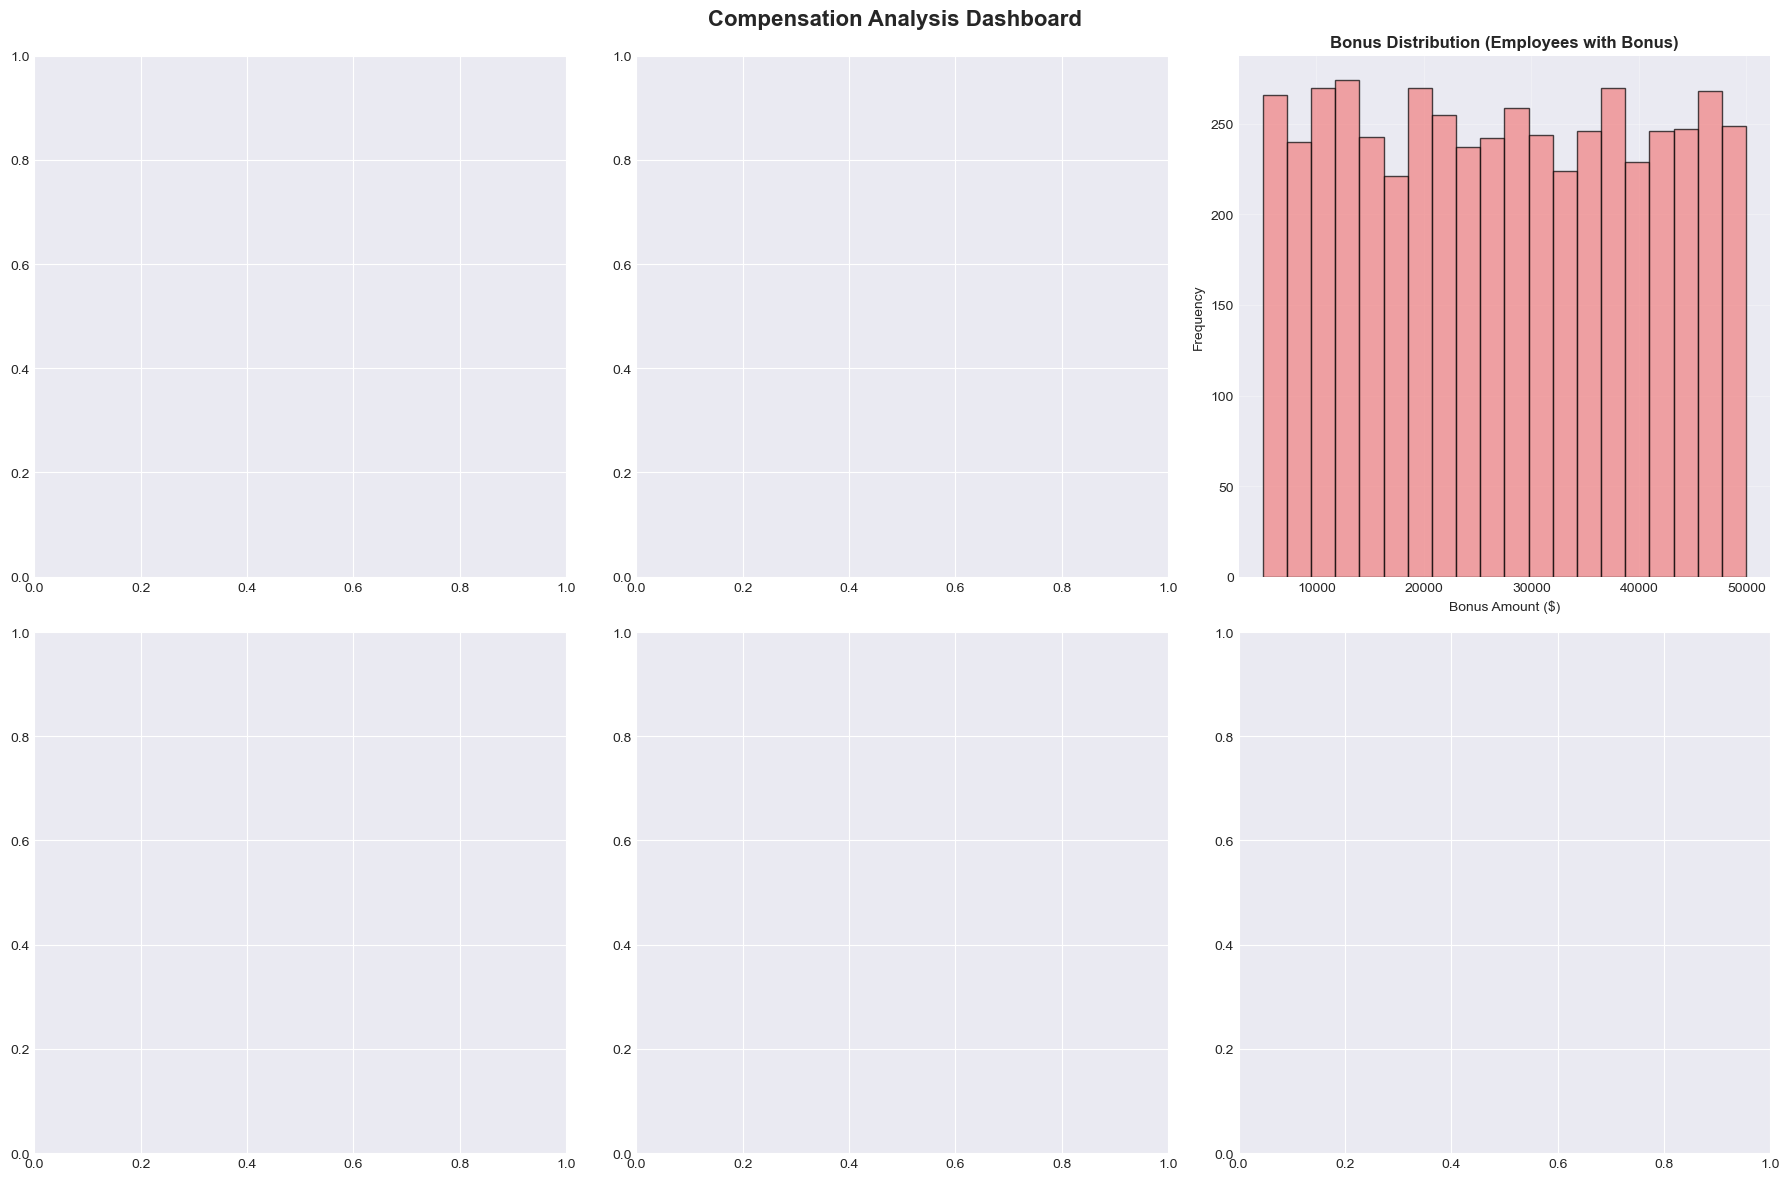

In [43]:
analyze_compensation(datasets)


## SECTION 7: ENGAGEMENT & SATISFACTION

In [44]:
def analyze_engagement(datasets):
    """Analyze employee engagement and satisfaction"""
    
    print("\n" + "="*80)
    print("😊 ENGAGEMENT & SATISFACTION ANALYSIS")
    print("="*80)
    
    engagement = datasets['engagement']
    employees = datasets['employees']
    
    # Get latest survey for each employee
    latest_survey = engagement.sort_values('survey_date').groupby('employee_id').last().reset_index()
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Employee Engagement & Satisfaction Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Engagement Score Distribution
    if 'engagement_score' in latest_survey.columns:
        ax1 = axes[0, 0]
        ax1.hist(latest_survey['engagement_score'], bins=20, color='lightblue', 
                edgecolor='black', alpha=0.7)
        ax1.axvline(latest_survey['engagement_score'].mean(), color='red', linestyle='--',
                   label=f'Mean: {latest_survey["engagement_score"].mean():.2f}')
        ax1.set_xlabel('Engagement Score')
        ax1.set_ylabel('Frequency')
        ax1.set_title('Engagement Score Distribution', fontweight='bold', fontsize=12)
        ax1.legend()
        ax1.grid(alpha=0.3)
    
    # 2. Job Satisfaction Distribution
    if 'job_satisfaction' in latest_survey.columns:
        ax2 = axes[0, 1]
        sat_counts = latest_survey['job_satisfaction'].value_counts().sort_index()
        ax2.bar(sat_counts.index, sat_counts.values, color='mediumseagreen', edgecolor='black')
        ax2.set_xlabel('Job Satisfaction (1-5)')
        ax2.set_ylabel('Number of Employees')
        ax2.set_title('Job Satisfaction Distribution', fontweight='bold', fontsize=12)
        ax2.grid(axis='y', alpha=0.3)
    
    # 3. Work-Life Balance
    if 'work_life_balance' in latest_survey.columns:
        ax3 = axes[0, 2]
        wlb_counts = latest_survey['work_life_balance'].value_counts().sort_index()
        ax3.bar(wlb_counts.index, wlb_counts.values, color='coral', edgecolor='black')
        ax3.set_xlabel('Work-Life Balance Rating (1-5)')
        ax3.set_ylabel('Number of Employees')
        ax3.set_title('Work-Life Balance Distribution', fontweight='bold', fontsize=12)
        ax3.grid(axis='y', alpha=0.3)
    
    # 4. Engagement vs Attrition
    if 'engagement_score' in latest_survey.columns:
        emp_eng = latest_survey.merge(employees[['employee_id']], on='employee_id', how='left')
        attrition = datasets['attrition']
        emp_eng['attrited'] = emp_eng['employee_id'].isin(attrition['employee_id'])
        
        ax4 = axes[1, 0]
        eng_bins = pd.cut(emp_eng['engagement_score'], bins=[0, 2, 3, 4, 5])
        eng_attrition = emp_eng.groupby(eng_bins)['attrited'].agg(['sum', 'count'])
        eng_attrition['rate'] = (eng_attrition['sum'] / eng_attrition['count'] * 100)
        
        bin_labels = ['Low\n(0-2)', 'Medium\n(2-3)', 'High\n(3-4)', 'Very High\n(4-5)']
        ax4.plot(bin_labels, eng_attrition['rate'], marker='o', linewidth=2, 
                markersize=10, color='crimson')
        ax4.set_ylabel('Attrition Rate (%)')
        ax4.set_title('Attrition Rate by Engagement Level', fontweight='bold', fontsize=12)
        ax4.grid(alpha=0.3)
    
    # 5. Manager Relationship
    if 'manager_relationship' in latest_survey.columns:
        ax5 = axes[1, 1]
        mgr_counts = latest_survey['manager_relationship'].value_counts().sort_index()
        ax5.bar(mgr_counts.index, mgr_counts.values, color='plum', edgecolor='black')
        ax5.set_xlabel('Manager Relationship Rating (1-5)')
        ax5.set_ylabel('Number of Employees')
        ax5.set_title('Manager Relationship Distribution', fontweight='bold', fontsize=12)
        ax5.grid(axis='y', alpha=0.3)
    
    # 6. Overall Satisfaction Trend
    if 'survey_date' in engagement.columns and 'job_satisfaction' in engagement.columns:
        ax6 = axes[1, 2]
        engagement['survey_date'] = pd.to_datetime(engagement['survey_date'])
        engagement['year'] = engagement['survey_date'].dt.year
        sat_trend = engagement.groupby('year')['job_satisfaction'].mean()
        ax6.plot(sat_trend.index, sat_trend.values, marker='o', linewidth=2, 
                markersize=8, color='green')
        ax6.set_xlabel('Year')
        ax6.set_ylabel('Average Job Satisfaction')
        ax6.set_title('Job Satisfaction Trend Over Time', fontweight='bold', fontsize=12)
        ax6.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/engagement_dashboard.png', dpi=300, bbox_inches='tight')
    print("✓ Engagement Dashboard saved!")



😊 ENGAGEMENT & SATISFACTION ANALYSIS
✓ Engagement Dashboard saved!


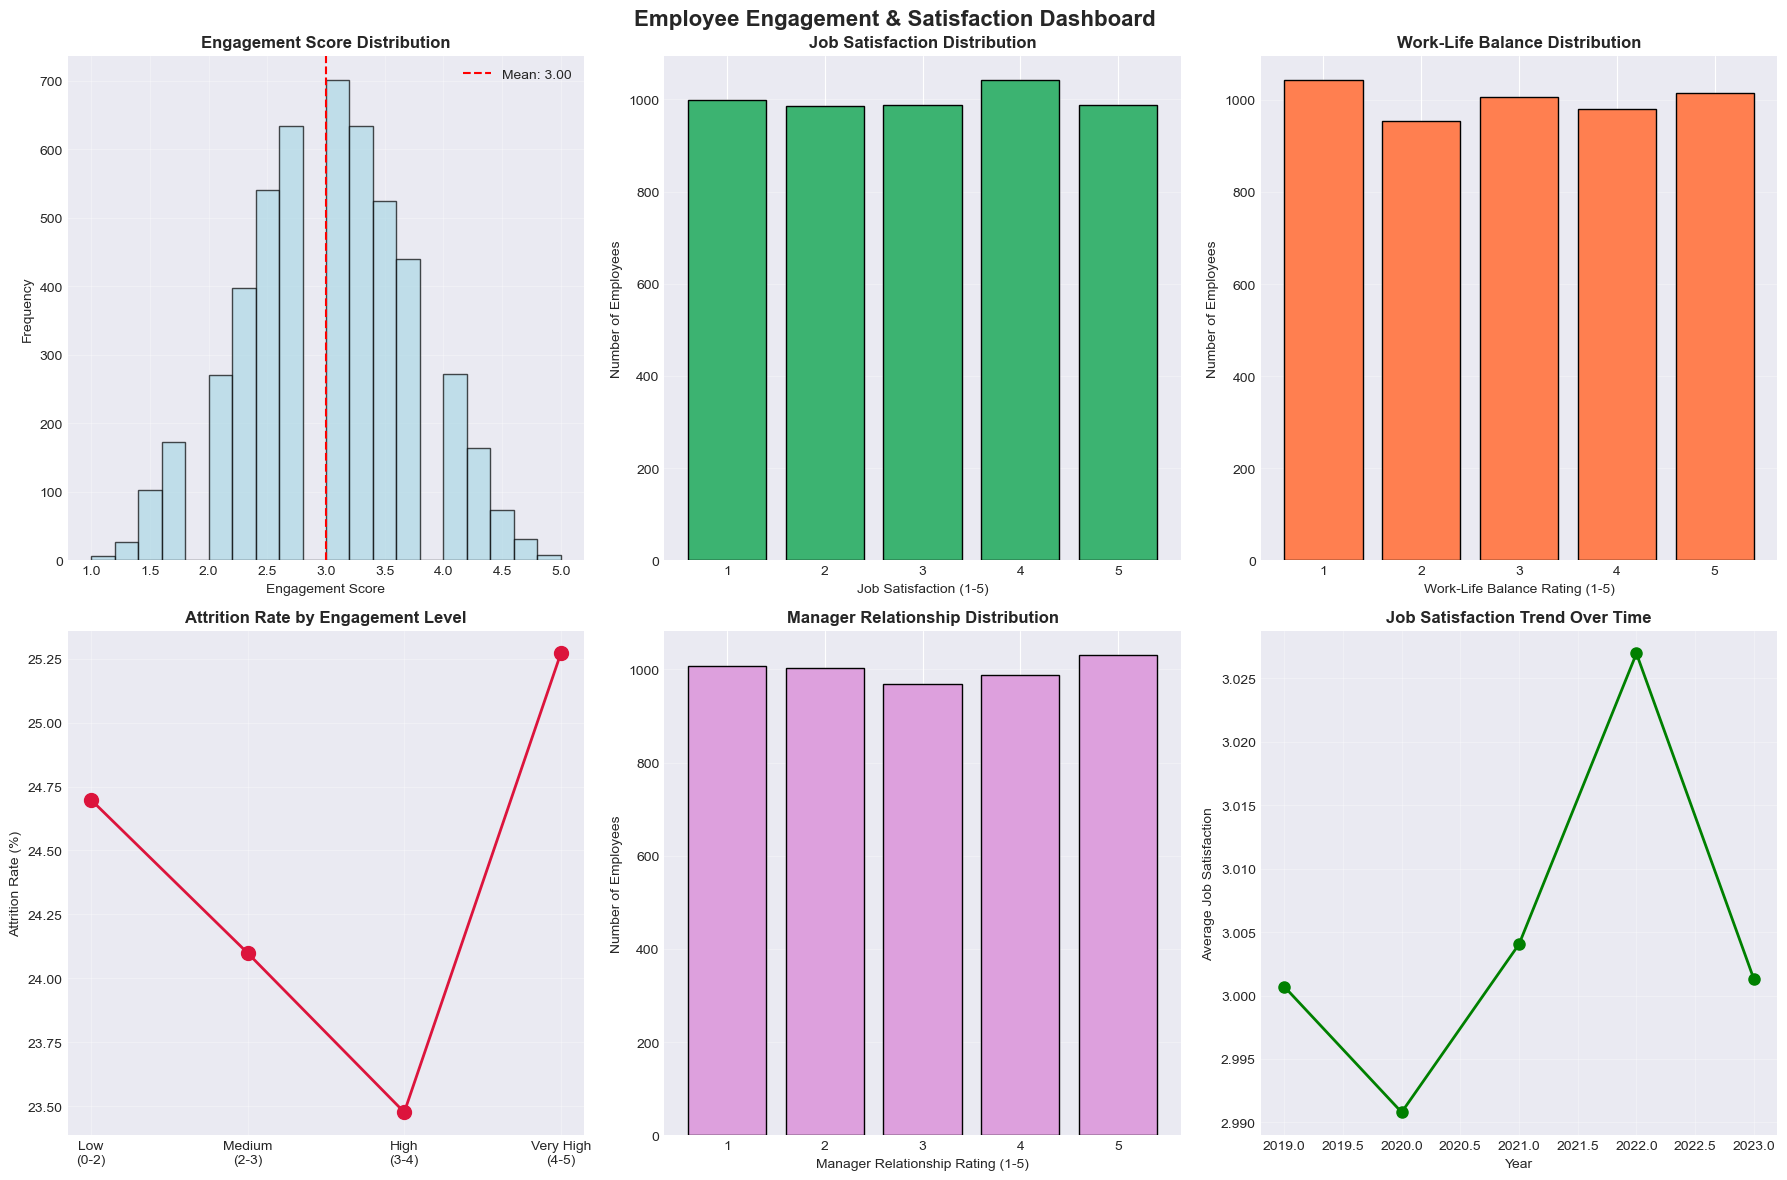

In [45]:
analyze_engagement(datasets)


## SECTION 8: ATTENDANCE ANALYSIS

In [52]:
def analyze_attendance(datasets):
    """Analyze attendance patterns"""
    
    print("\n" + "="*80)
    print("📅 ATTENDANCE ANALYSIS")
    print("="*80)
    
    attendance = datasets['attendance']
    employees = datasets['employees']
    
    # Aggregate attendance by employee
    emp_attendance = attendance.groupby('employee_id').agg({
        'days_present': 'mean',
        'days_absent': 'mean'
    }).reset_index()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Attendance Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Average Days Present
    ax1 = axes[0, 0]
    ax1.hist(emp_attendance['days_present'], bins=20, color='lightgreen', 
             edgecolor='black', alpha=0.7)
    ax1.axvline(emp_attendance['days_present'].mean(), color='red', linestyle='--',
                label=f'Mean: {emp_attendance["days_present"].mean():.1f} days')
    ax1.set_xlabel('Average Days Present per Month')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Days Present Distribution', fontweight='bold', fontsize=12)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Average Days Absent
    ax2 = axes[0, 1]
    ax2.hist(emp_attendance['days_absent'], bins=20, color='lightcoral', 
             edgecolor='black', alpha=0.7)
    ax2.axvline(emp_attendance['days_absent'].mean(), color='red', linestyle='--',
                label=f'Mean: {emp_attendance["days_absent"].mean():.1f} days')
    ax2.set_xlabel('Average Days Absent per Month')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Days Absent Distribution', fontweight='bold', fontsize=12)
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    # 3. Attendance vs Attrition
    emp_att = emp_attendance.merge(employees[['employee_id']], on='employee_id', how='left')
    attrition = datasets['attrition']
    emp_att['attrited'] = emp_att['employee_id'].isin(attrition['employee_id'])
    
    ax3 = axes[1, 0]
    
    avg_present_active = emp_att[~emp_att['attrited']]['days_present'].mean()
    avg_present_attrited = emp_att[emp_att['attrited']]['days_present'].mean()
    avg_absent_active = emp_att[~emp_att['attrited']]['days_absent'].mean()
    avg_absent_attrited = emp_att[emp_att['attrited']]['days_absent'].mean()
    
    x = np.arange(2)
    width = 0.35
    
    ax3.bar(x - width/2, [avg_present_active, avg_absent_active], width, 
            label='Active', color='green')
    ax3.bar(x + width/2, [avg_present_attrited, avg_absent_attrited], width, 
            label='Attrited', color='red')
    
    ax3.set_ylabel('Average Days per Month')
    ax3.set_title('Attendance Comparison: Active vs Attrited', fontweight='bold', fontsize=12)
    ax3.set_xticks(x)
    ax3.set_xticklabels(['Days Present', 'Days Absent'])
    ax3.legend()
    ax3.grid(axis='y', alpha=0.3)

    # Remove empty subplot
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.savefig('outputs/attendance_dashboard.png', dpi=300, bbox_inches='tight')
    print("✓ Attendance Dashboard saved!")



📅 ATTENDANCE ANALYSIS
✓ Attendance Dashboard saved!


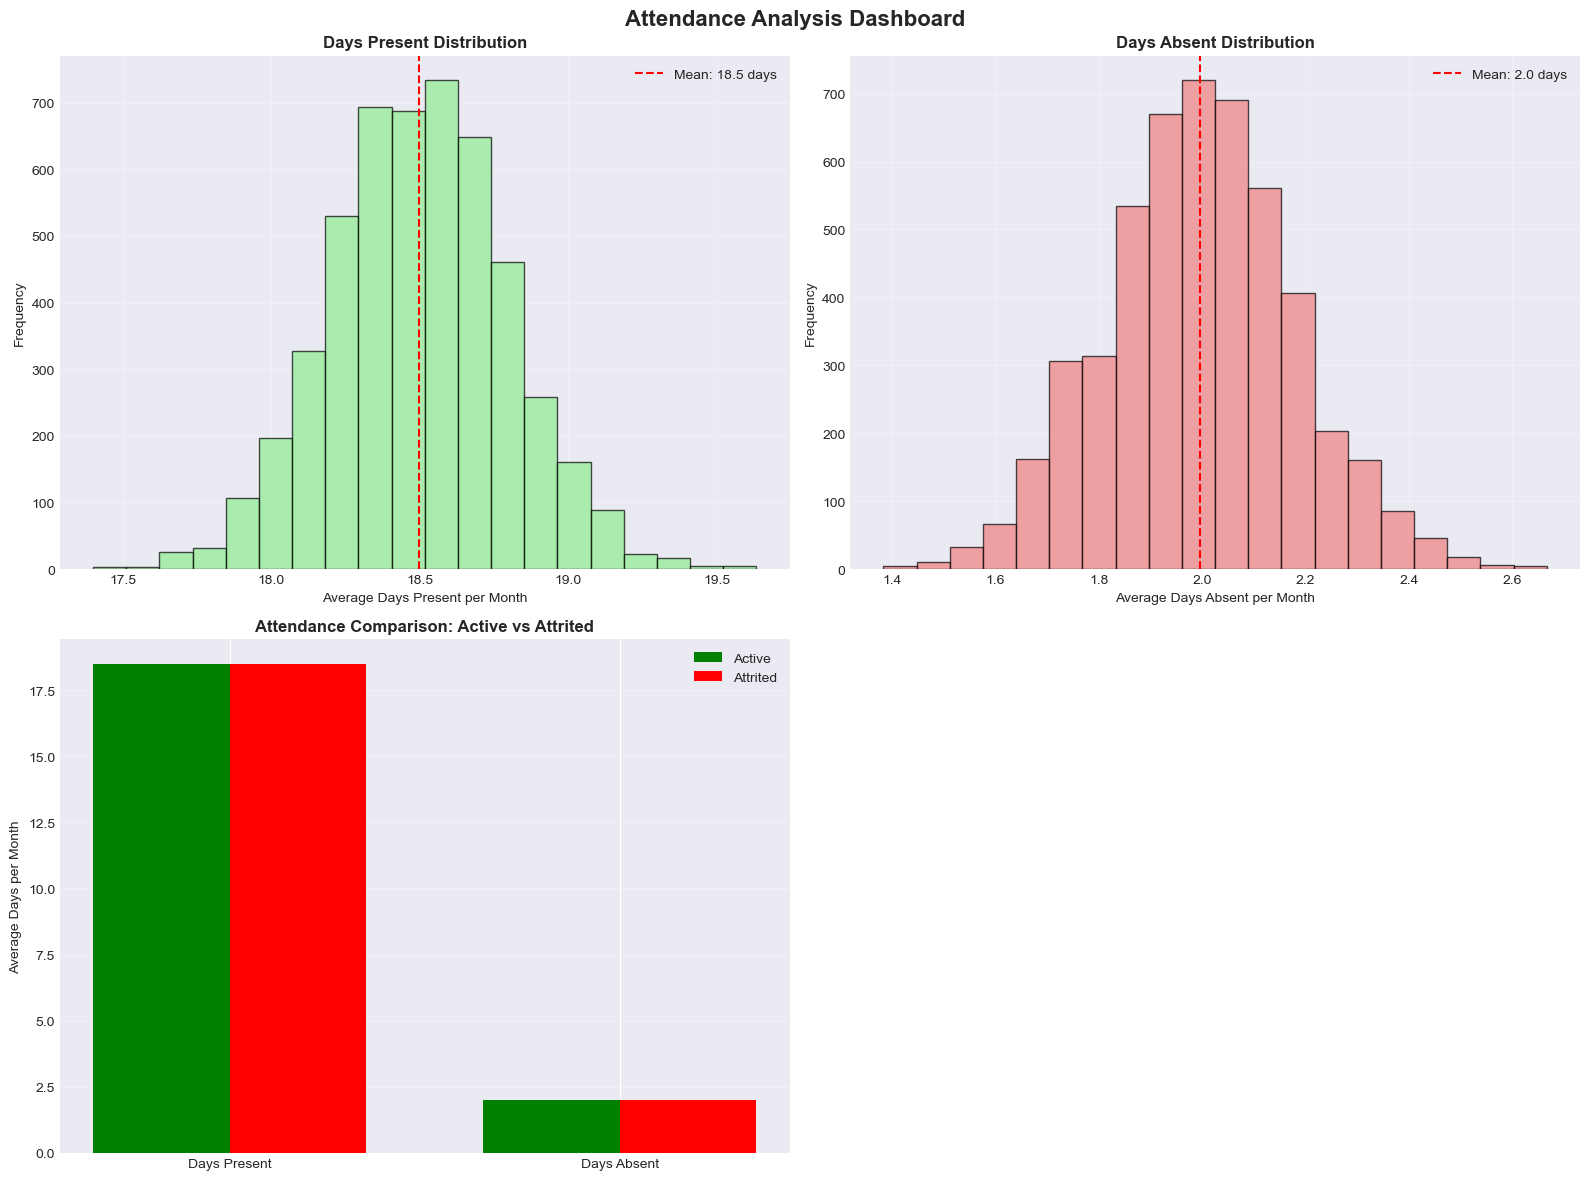

In [53]:
analyze_attendance(datasets)


## SECTION 9: TRAINING & DEVELOPMENT

In [56]:
datasets['training'].columns


Index(['skill_id', 'employee_id', 'skill_name', 'skill_category',
       'proficiency_level', 'training_completed', 'certification_flag'],
      dtype='object')

In [57]:
def analyze_training(datasets):
    """Analyze training and skills development"""
    
    print("\n" + "="*80)
    print("🎓 TRAINING & DEVELOPMENT ANALYSIS")
    print("="*80)
    
    training = datasets['training']
    employees = datasets['employees']
    
    # Aggregate skills/training by employee
    emp_training = training.groupby('employee_id').agg({
        'skill_id': 'count',
        'training_completed': 'sum',
        'certification_flag': 'sum'
    }).reset_index()

    emp_training.columns = ['employee_id', 'total_skills', 'completed_training', 'certifications']

    emp_training['completion_rate'] = (
        emp_training['completed_training'] / emp_training['total_skills'] * 100
    )
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Training & Development Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Number of Skills per Employee
    ax1 = axes[0, 0]
    ax1.hist(emp_training['total_skills'], bins=20, color='skyblue',
             edgecolor='black', alpha=0.7)
    ax1.axvline(emp_training['total_skills'].mean(), color='red', linestyle='--',
                label=f'Mean: {emp_training["total_skills"].mean():.1f}')
    ax1.set_xlabel('Number of Skills')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Skills per Employee', fontweight='bold', fontsize=12)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Completion Rate
    ax2 = axes[0, 1]
    ax2.hist(emp_training['completion_rate'], bins=20, color='lightgreen',
             edgecolor='black', alpha=0.7)
    ax2.axvline(emp_training['completion_rate'].mean(), color='red', linestyle='--',
                label=f'Mean: {emp_training["completion_rate"].mean():.1f}%')
    ax2.set_xlabel('Completion Rate (%)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Training Completion Rate', fontweight='bold', fontsize=12)
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    # 3. Certifications Distribution
    ax3 = axes[1, 0]
    ax3.hist(emp_training['certifications'], bins=20, color='plum',
             edgecolor='black', alpha=0.7)
    ax3.set_xlabel('Certifications per Employee')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Certifications Distribution', fontweight='bold', fontsize=12)
    ax3.grid(alpha=0.3)
    
    # 4. Training vs Attrition
    emp_train = emp_training.merge(employees[['employee_id']], on='employee_id', how='left')
    attrition = datasets['attrition']
    emp_train['attrited'] = emp_train['employee_id'].isin(attrition['employee_id'])
    
    ax4 = axes[1, 1]
    
    avg_active = emp_train[~emp_train['attrited']]['total_skills'].mean()
    avg_attrited = emp_train[emp_train['attrited']]['total_skills'].mean()
    
    ax4.bar(['Active', 'Attrited'], [avg_active, avg_attrited],
            color=['green', 'red'])
    
    ax4.set_ylabel('Average Skills')
    ax4.set_title('Skills Comparison: Active vs Attrited', fontweight='bold', fontsize=12)
    ax4.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/training_dashboard.png', dpi=300, bbox_inches='tight')
    print("✓ Training Dashboard saved!")



🎓 TRAINING & DEVELOPMENT ANALYSIS
✓ Training Dashboard saved!


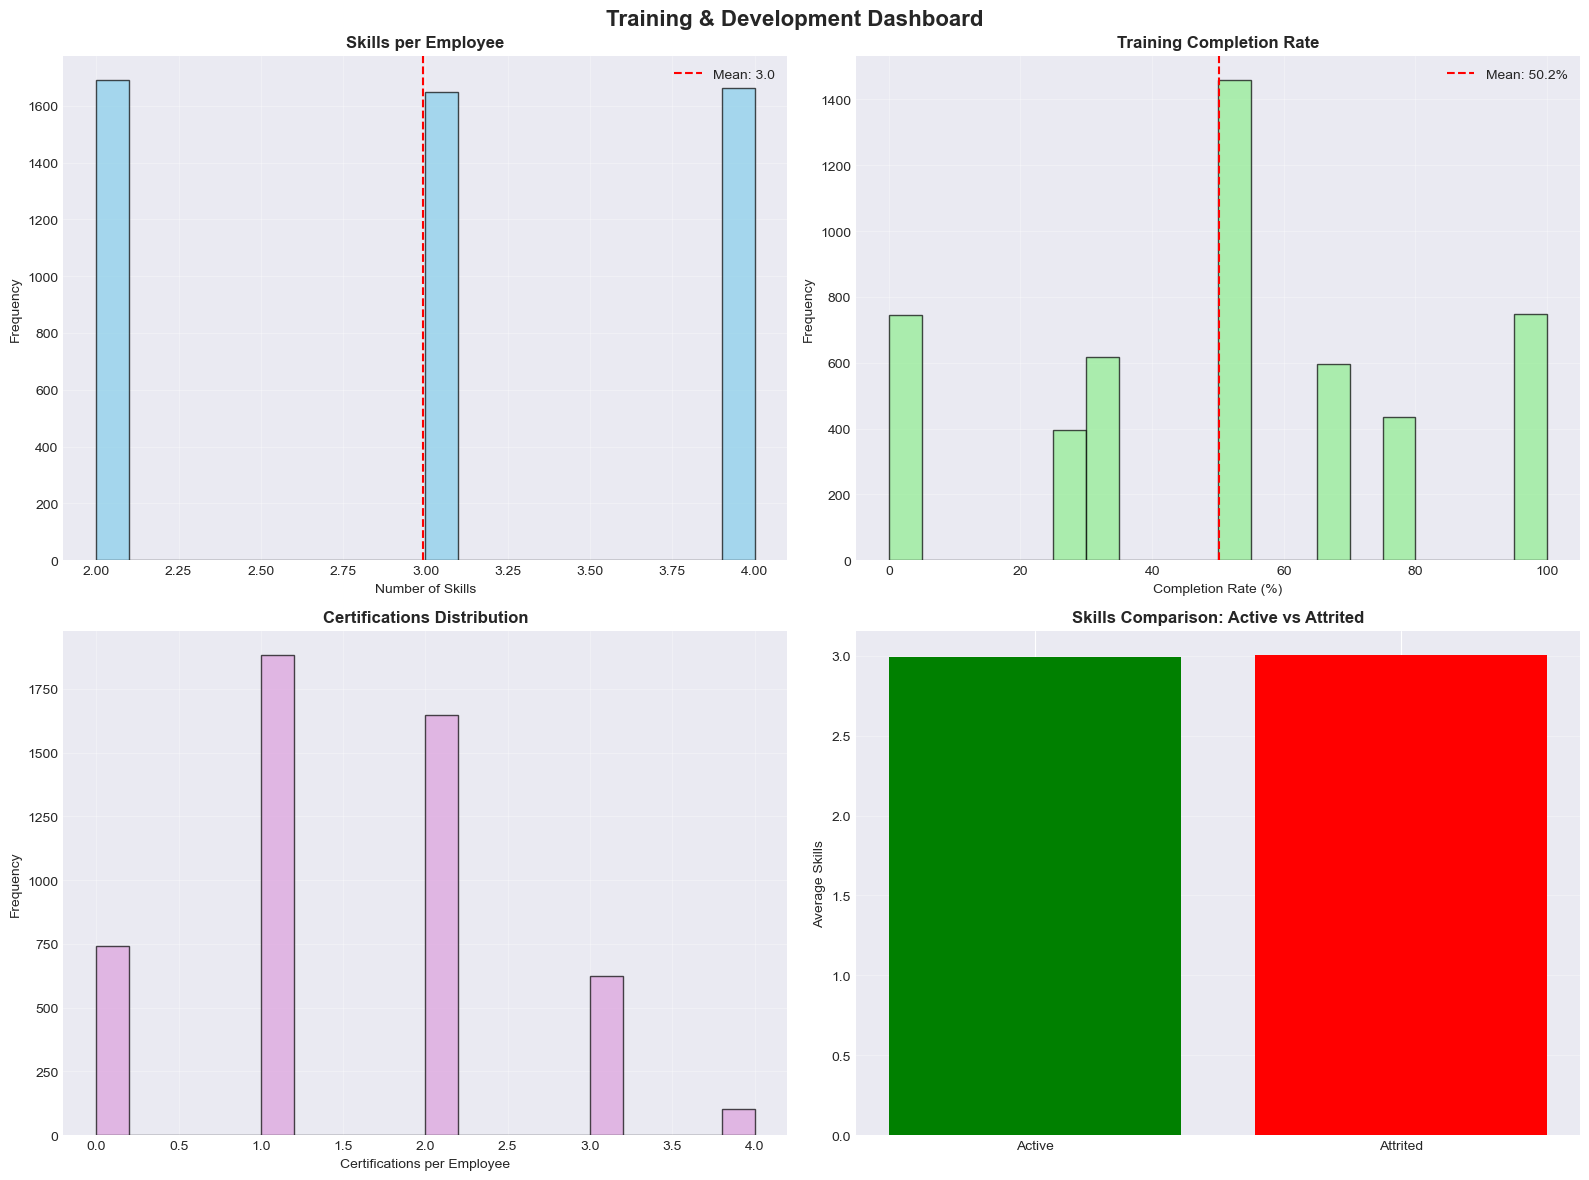

In [58]:
analyze_training(datasets)


## # SECTION 10: CORRELATION ANALYSIS

In [70]:
def correlation_analysis(datasets):
    """Analyze correlations between key metrics"""
    
    print("\n" + "="*80)
    print("🔗 CORRELATION ANALYSIS")
    print("="*80)
    
    employees = datasets['employees']
    attrition = datasets['attrition']
    
    # Create master dataset
    master_df = employees[['employee_id', 'age']].copy()
    
    # Add tenure if exists
    if 'tenure_years' in employees.columns:
        master_df['tenure_years'] = employees['tenure_years']
    
    # Add attrition flag
    master_df['attrited'] = master_df['employee_id'].isin(attrition['employee_id']).astype(int)
    
    # Add latest performance
    performance = datasets['performance']
    latest_perf = performance.sort_values('review_date').groupby('employee_id').last()

    master_df = master_df.merge(
        latest_perf[['performance_rating', 'goal_completion_pct']],
        on='employee_id',
        how='left'
    )
    
    # Add latest compensation
    compensation = datasets['compensation']
    latest_comp = compensation.sort_values('effective_date').groupby('employee_id').last()

    comp_cols = [col for col in ['base_salary', 'bonus_amount'] if col in latest_comp.columns]
    master_df = master_df.merge(latest_comp[comp_cols], on='employee_id', how='left')
    
    # Add latest engagement
    engagement = datasets['engagement']
    latest_eng = engagement.sort_values('survey_date').groupby('employee_id').last()

    eng_cols = [col for col in ['engagement_score', 'job_satisfaction'] if col in latest_eng.columns]
    master_df = master_df.merge(latest_eng[eng_cols], on='employee_id', how='left')
    
    # Add attendance metrics
    attendance = datasets['attendance']
    emp_att = attendance.groupby('employee_id').agg({
        'days_present': 'mean',
        'days_absent': 'mean'
    })
    master_df = master_df.merge(emp_att, on='employee_id', how='left')
    
    # Select numeric columns
    numeric_cols = master_df.select_dtypes(include=[np.number]).columns.tolist()
    if 'employee_id' in numeric_cols:
        numeric_cols.remove('employee_id')

    # Correlation matrix
    corr_matrix = master_df[numeric_cols].corr()
    
    # Heatmap
    fig, ax = plt.subplots(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, ax=ax)
    
    ax.set_title('Correlation Matrix - Employee Metrics',
                 fontweight='bold', fontsize=14)
    
    plt.tight_layout()
    plt.savefig('outputs/correlation_heatmap.png', dpi=300)
    print("✓ Correlation Heatmap saved!")
    
    # Print top attrition correlations
    print("\n📊 Top Correlations with Attrition:")
    print("-" * 50)
    
    attr_corr = corr_matrix['attrited'].drop('attrited').sort_values(key=abs, ascending=False)
    
    for feature, corr in attr_corr.items():
        print(f"{feature:.<30} {corr:>7.3f}")



🔗 CORRELATION ANALYSIS
✓ Correlation Heatmap saved!

📊 Top Correlations with Attrition:
--------------------------------------------------
age...........................   0.021
bonus_amount..................   0.020
days_absent...................  -0.012
job_satisfaction..............  -0.009
days_present..................   0.008
goal_completion_pct...........  -0.006
tenure_years..................  -0.004
engagement_score..............  -0.003
performance_rating............  -0.002


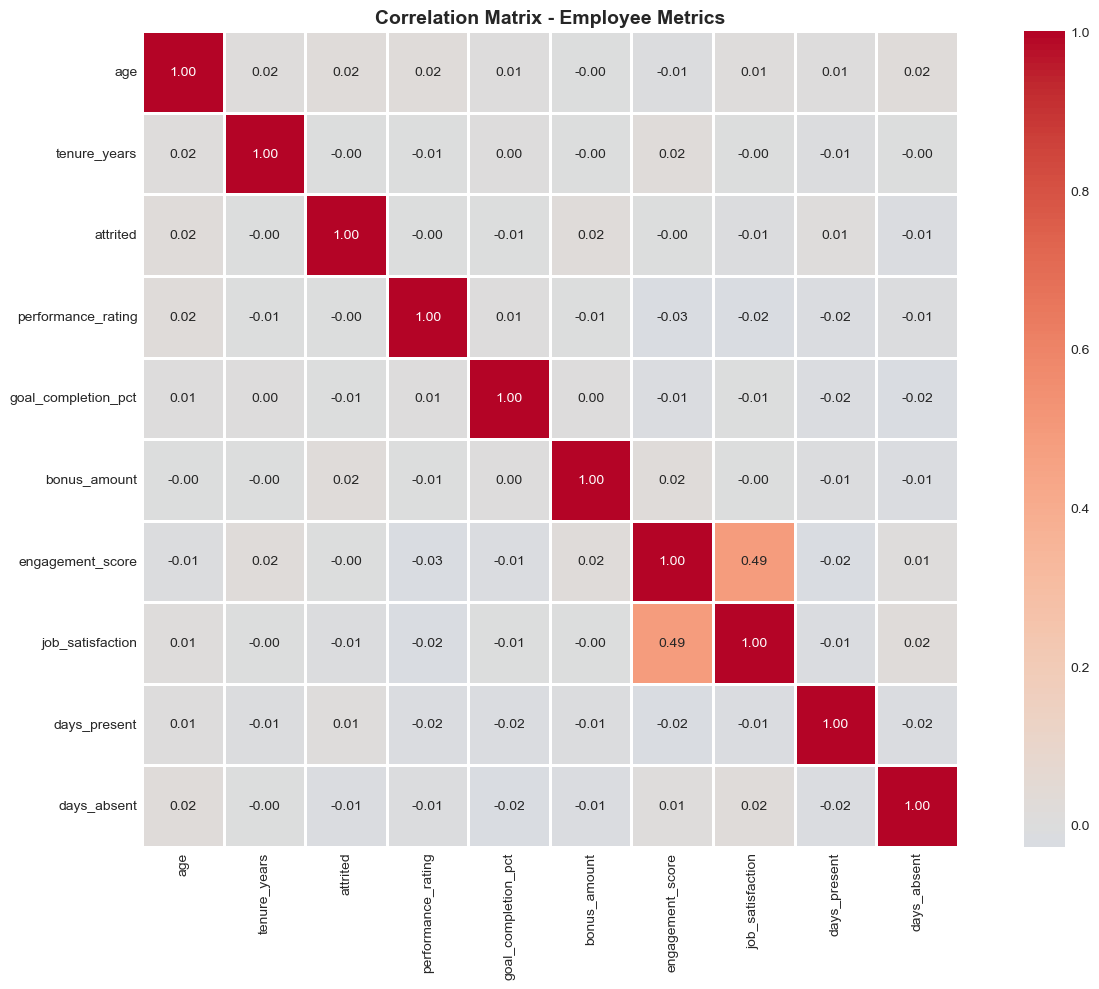

In [71]:
correlation_analysis(datasets)

## SECTION 11: INTERACTIVE PLOTLY DASHBOARD

In [74]:
def create_interactive_dashboard(datasets):
    """Create interactive Plotly dashboard"""
    
    print("\n" + "="*80)
    print("📊 CREATING INTERACTIVE DASHBOARD")
    print("="*80)
    
    employees = datasets['employees']
    attrition = datasets['attrition']
    departments = datasets['departments']
    
    # Merge data
    emp_with_attrition = employees.merge(
        attrition[['employee_id']], 
        on='employee_id', 
        how='left', 
        indicator=True
    )
    emp_with_attrition['attrited'] = emp_with_attrition['_merge'] == 'both'
    emp_with_attrition['status'] = emp_with_attrition['attrited'].map({True: 'Attrited', False: 'Active'})
    
    # Merge with departments
    emp_dept = emp_with_attrition.merge(departments, on='department_id', how='left')
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Attrition by Department', 'Age Distribution by Status',
                       'Tenure Distribution', 'Attrition Rate Trend'),
        specs=[[{"type": "bar"}, {"type": "box"}],
               [{"type": "histogram"}, {"type": "scatter"}]]
    )
    
    # 1. Attrition by Department
    dept_attrition = emp_dept.groupby('department_name')['attrited'].agg(['sum', 'count'])
    dept_attrition['rate'] = (dept_attrition['sum'] / dept_attrition['count'] * 100)
    dept_attrition = dept_attrition.sort_values('rate', ascending=False).head(10)
    
    fig.add_trace(
        go.Bar(x=dept_attrition.index, y=dept_attrition['rate'],
               marker_color='indianred', name='Attrition Rate'),
        row=1, col=1
    )
    
    # 2. Age Distribution by Status
    for status in ['Active', 'Attrited']:
        fig.add_trace(
            go.Box(y=emp_dept[emp_dept['status'] == status]['age'],
                   name=status),
            row=1, col=2
        )
    
    # 3. Tenure Distribution
    if 'tenure_years' in emp_dept.columns:
        fig.add_trace(
            go.Histogram(x=emp_dept['tenure_years'], nbinsx=30,
                        marker_color='steelblue', name='Tenure'),
            row=2, col=1
        )
    
    # 4. Attrition Rate Trend (if date available)
    if 'exit_date' in attrition.columns:
        attrition_copy = attrition.copy()
        attrition_copy['exit_date'] = pd.to_datetime(attrition_copy['exit_date'])
        attrition_copy['year_month'] = attrition_copy['exit_date'].dt.to_period('M')
        trend = attrition_copy.groupby('year_month').size()
        
        fig.add_trace(
            go.Scatter(x=trend.index.astype(str), y=trend.values,
                      mode='lines+markers', marker_color='crimson',
                      name='Attrition Count'),
            row=2, col=2
        )
    
    # Update layout
    fig.update_layout(height=800, showlegend=True,
                     title_text="Workforce Analytics - Interactive Dashboard",
                     title_font_size=20)
    
    # Save as HTML
    fig.write_html('outputs/interactive_dashboard.html')
    print("✓ Interactive Dashboard saved as HTML!")

In [75]:
create_interactive_dashboard(datasets)


📊 CREATING INTERACTIVE DASHBOARD
✓ Interactive Dashboard saved as HTML!


## # SECTION 12: EXECUTIVE SUMMARY REPORT

In [84]:
def generate_executive_summary(datasets, metrics):
    """Generate executive summary report"""
    
    print("\n" + "="*80)
    print("📄 GENERATING EXECUTIVE SUMMARY")
    print("="*80)
    
    employees = datasets['employees']
    attrition = datasets['attrition']
    departments = datasets['departments']
    
    # Create summary report
    report = []
    report.append("="*80)
    report.append("WORKFORCE PLANNING ANALYSIS - EXECUTIVE SUMMARY")
    report.append("="*80)
    report.append(f"\nReport Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    report.append("\n" + "-"*80)
    
    # Key Metrics
    report.append("\n📊 KEY METRICS")
    report.append("-"*80)
    report.append(f"Total Employees:        {metrics['total_employees']:>8,}")
    report.append(f"Active Employees:       {metrics['active_employees']:>8,} ({(metrics['active_employees']/metrics['total_employees']*100):.1f}%)")
    report.append(f"Attrited Employees:     {metrics['attrited_employees']:>8,} ({metrics['attrition_rate']:.2f}%)")
    
    # Department Analysis
    emp_dept = employees.merge(departments, on='department_id', how='left')
    emp_dept['attrited'] = emp_dept['employee_id'].isin(attrition['employee_id'])
    
    report.append("\n" + "-"*80)
    report.append("🏢 DEPARTMENT INSIGHTS")
    report.append("-"*80)
    dept_stats = emp_dept.groupby('department_name').agg({
        'employee_id': 'count',
        'attrited': ['sum', lambda x: (x.sum() / len(x) * 100)]
    })
    dept_stats.columns = ['Total', 'Attrited', 'Rate(%)']
    dept_stats = dept_stats.sort_values('Rate(%)', ascending=False).head(5)
    
    report.append("\nTop 5 Departments by Attrition Rate:")
    for dept, row in dept_stats.iterrows():
        report.append(f"  • {dept:.<35} {row['Rate(%)']:>6.2f}%")
    
    # Age Analysis
    report.append("\n" + "-"*80)
    report.append("👥 DEMOGRAPHIC INSIGHTS")
    report.append("-"*80)
    report.append(f"Average Age:            {employees['age'].mean():>8.1f} years")
    if 'tenure_years' in employees.columns:
        report.append(f"Average Tenure:         {employees['tenure_years'].mean():>8.1f} years")
    
    # Performance Insights
    if 'performance' in datasets:
        performance = datasets['performance']
        latest_perf = performance.sort_values('review_date').groupby('employee_id').last()
        if 'performance_rating' in latest_perf.columns:
            report.append(f"Avg Performance Rating: {latest_perf['performance_rating'].mean():>8.2f}/5.0")
    
    # Engagement Insights
    if 'engagement' in datasets:
        engagement = datasets['engagement']
        latest_eng = engagement.sort_values('survey_date').groupby('employee_id').last()
        if 'engagement_score' in latest_eng.columns:
            report.append(f"Avg Engagement Score:   {latest_eng['engagement_score'].mean():>8.2f}/5.0")
        if 'job_satisfaction' in latest_eng.columns:
            report.append(f"Avg Job Satisfaction:   {latest_eng['job_satisfaction'].mean():>8.2f}/5.0")
    
    # Top Attrition Reasons
    if 'reason' in attrition.columns:
        report.append("\n" + "-"*80)
        report.append("📋 TOP ATTRITION REASONS")
        report.append("-"*80)
        top_reasons = attrition['reason'].value_counts().head(5)
        for reason, count in top_reasons.items():
            pct = (count / len(attrition)) * 100
            report.append(f"  • {reason:.<35} {count:>5} ({pct:.1f}%)")
    
    # Recommendations
    report.append("\n" + "-"*80)
    report.append("💡 KEY RECOMMENDATIONS")
    report.append("-"*80)
    report.append("  1. Focus retention efforts on high-attrition departments")
    report.append("  2. Improve engagement and satisfaction scores")
    report.append("  3. Review compensation for at-risk employee segments")
    report.append("  4. Enhance work-life balance initiatives")
    report.append("  5. Strengthen manager-employee relationships")
    
    report.append("\n" + "="*80)
    report.append("END OF EXECUTIVE SUMMARY")
    report.append("="*80)
    
    # Save report
    report_text = '\n'.join(report)
    with open('outputs/executive_summary.txt', 'w', encoding='utf-8') as f:
        f.write(report_text)
    
    print("✓ Executive Summary saved!")
    print("\n" + report_text)


In [85]:
metrics = data_overview(datasets)


📊 DATA OVERVIEW & SUMMARY STATISTICS

🔢 KEY METRICS:
   • Total Employees: 5,000
   • Active Employees: 3,800 (76.0%)
   • Attrited Employees: 1,200
   • Attrition Rate: 24.00%

👥 AGE DISTRIBUTION:
   • Mean Age: 40.2 years
   • Median Age: 40.0 years
   • Age Range: 21 - 59 years

📅 TENURE DISTRIBUTION:
   • Mean Tenure: 8.49 years
   • Median Tenure: 8.55 years
   • Max Tenure: 15.00 years

🏢 DEPARTMENT DISTRIBUTION:
   • Number of Departments: 18
   • Largest Department: 275 employees
   • Smallest Department: 231 employees



In [86]:
generate_executive_summary(datasets, metrics)


📄 GENERATING EXECUTIVE SUMMARY
✓ Executive Summary saved!

WORKFORCE PLANNING ANALYSIS - EXECUTIVE SUMMARY

Report Generated: 2026-02-04 23:06:47

--------------------------------------------------------------------------------

📊 KEY METRICS
--------------------------------------------------------------------------------
Total Employees:           5,000
Active Employees:          3,800 (76.0%)
Attrited Employees:        1,200 (24.00%)

--------------------------------------------------------------------------------
🏢 DEPARTMENT INSIGHTS
--------------------------------------------------------------------------------

Top 5 Departments by Attrition Rate:
  • Facilities.........................  28.76%
  • Sales..............................  27.09%
  • Marketing..........................  26.34%
  • Operations.........................  25.62%
  • Quality Assurance..................  25.31%

--------------------------------------------------------------------------------
👥 DEMOGRAPHIC 

## # MAIN EXECUTION


🚀 Starting Comprehensive EDA...
📁 Loading Datasets...
--------------------------------------------------------------------------------
✓ EMPLOYEES: 5,000 rows × 20 columns
✓ DEPARTMENTS: 20 rows × 5 columns
✓ ATTRITION: 1,200 rows × 7 columns
✓ COMPENSATION: 15,073 rows × 8 columns
✓ PERFORMANCE: 10,048 rows × 7 columns
✓ ENGAGEMENT: 7,472 rows × 8 columns
✓ ATTENDANCE: 300,000 rows × 8 columns
✓ JOB_HISTORY: 10,010 rows × 9 columns
✓ TRAINING: 14,969 rows × 7 columns


📊 DATA OVERVIEW & SUMMARY STATISTICS

🔢 KEY METRICS:
   • Total Employees: 5,000
   • Active Employees: 3,800 (76.0%)
   • Attrited Employees: 1,200
   • Attrition Rate: 24.00%

👥 AGE DISTRIBUTION:
   • Mean Age: 40.2 years
   • Median Age: 40.0 years
   • Age Range: 21 - 59 years

📅 TENURE DISTRIBUTION:
   • Mean Tenure: 8.49 years
   • Median Tenure: 8.55 years
   • Max Tenure: 15.00 years

🏢 DEPARTMENT DISTRIBUTION:
   • Number of Departments: 18
   • Largest Department: 275 employees
   • Smallest Department: 231 e

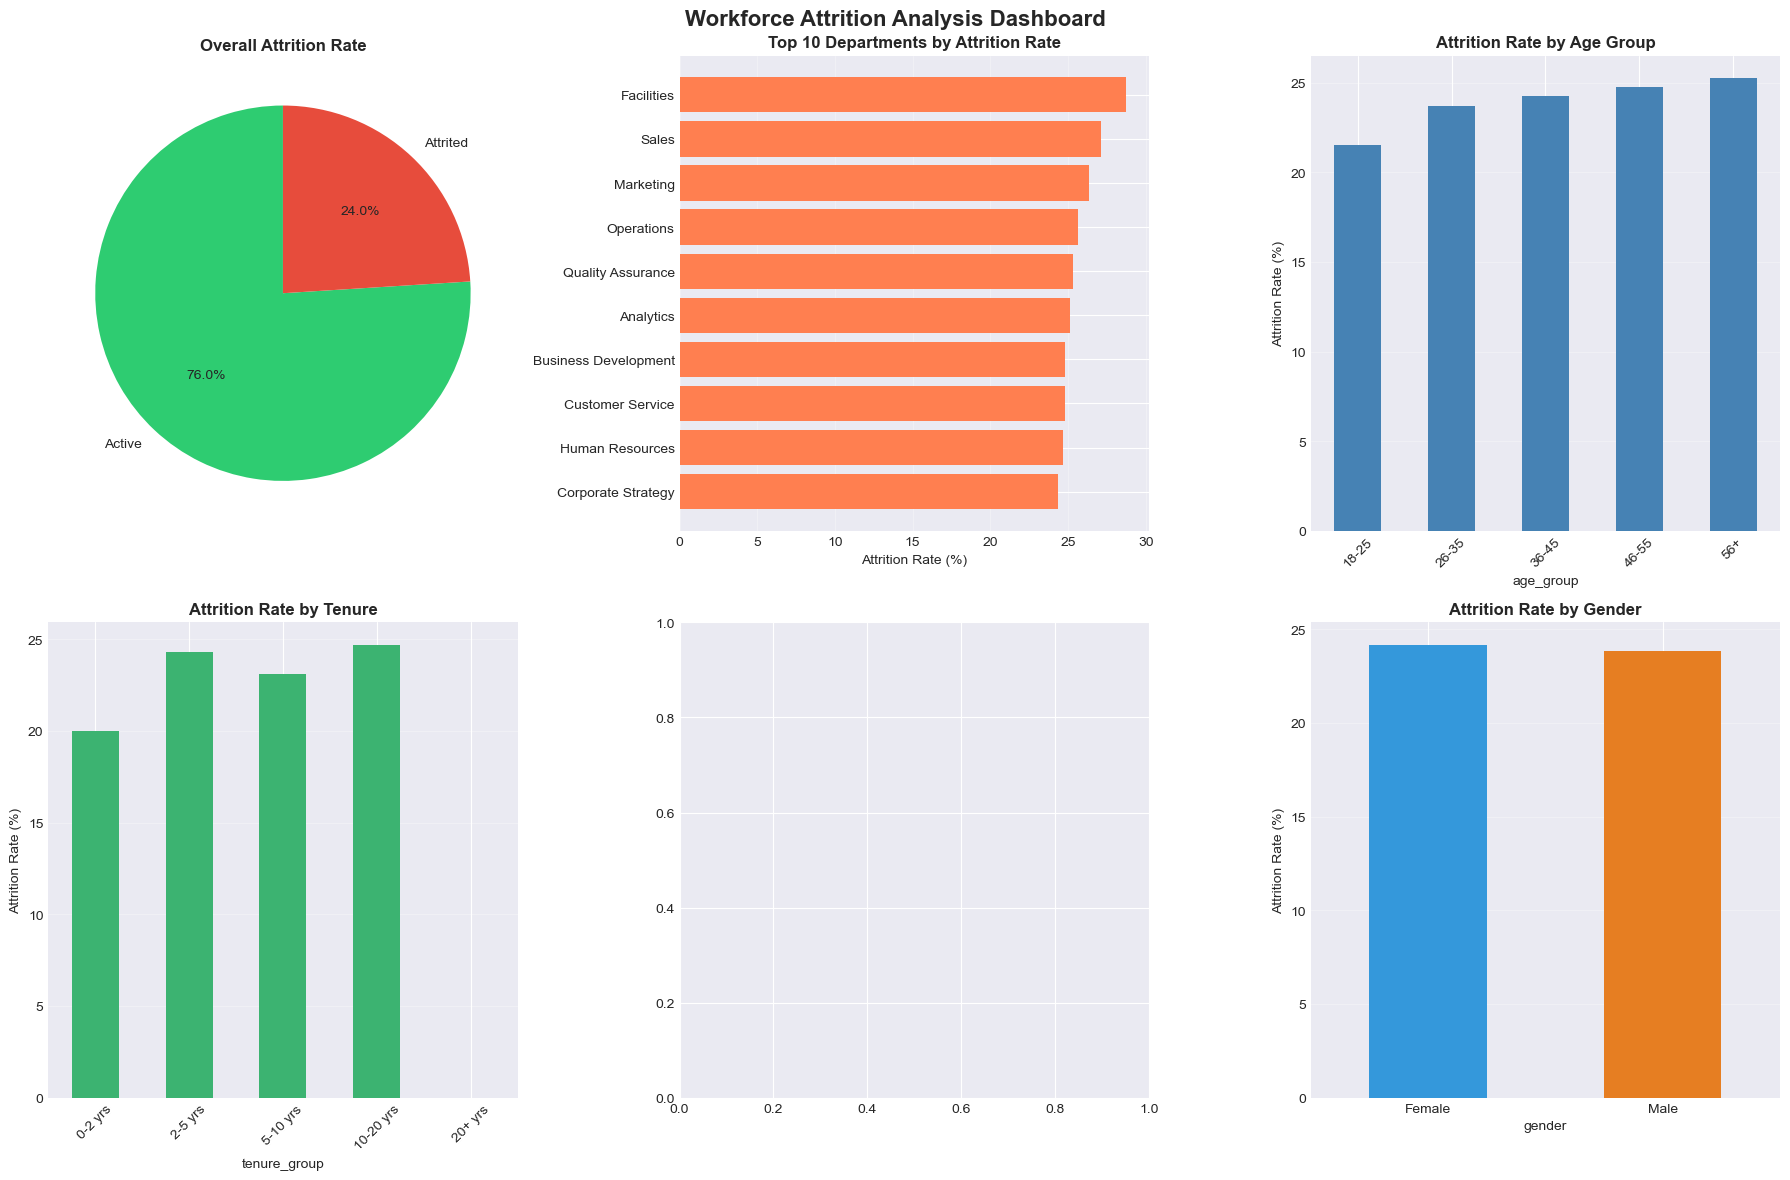

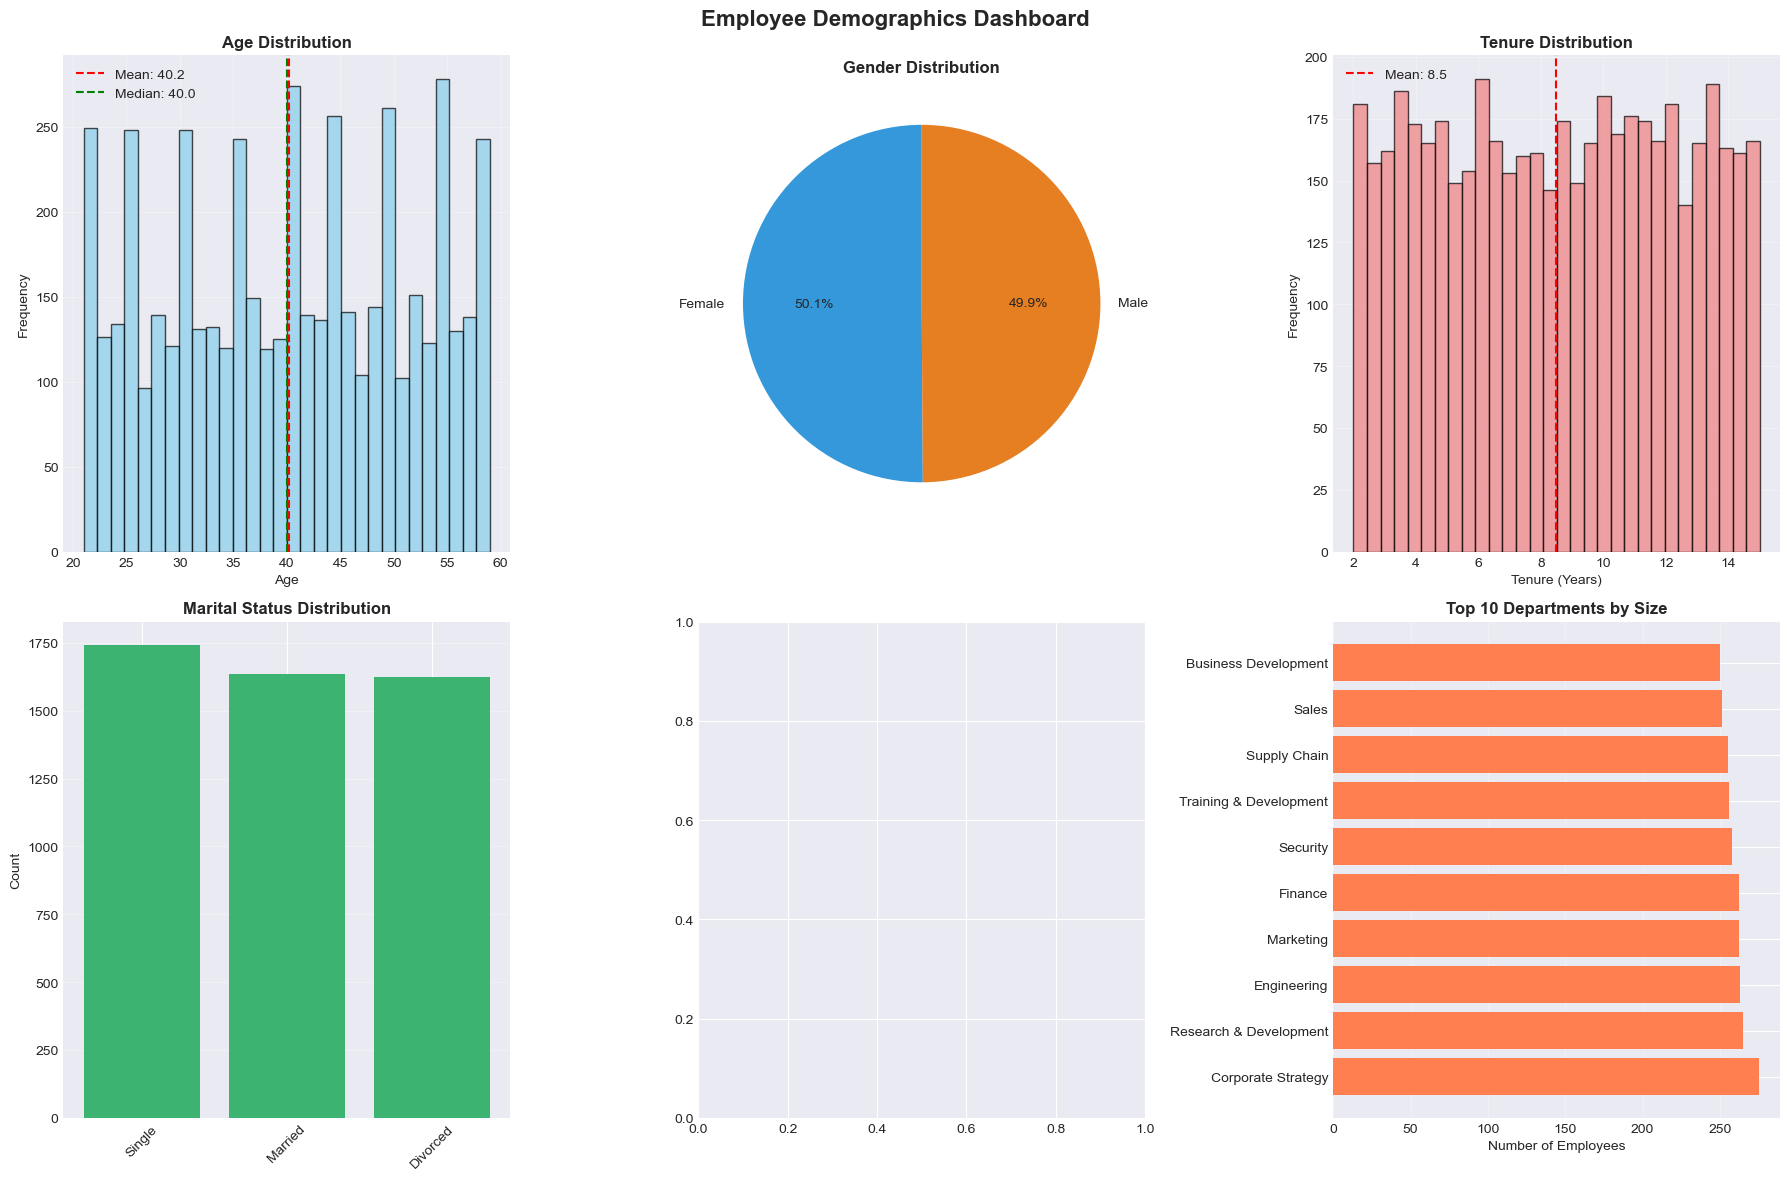

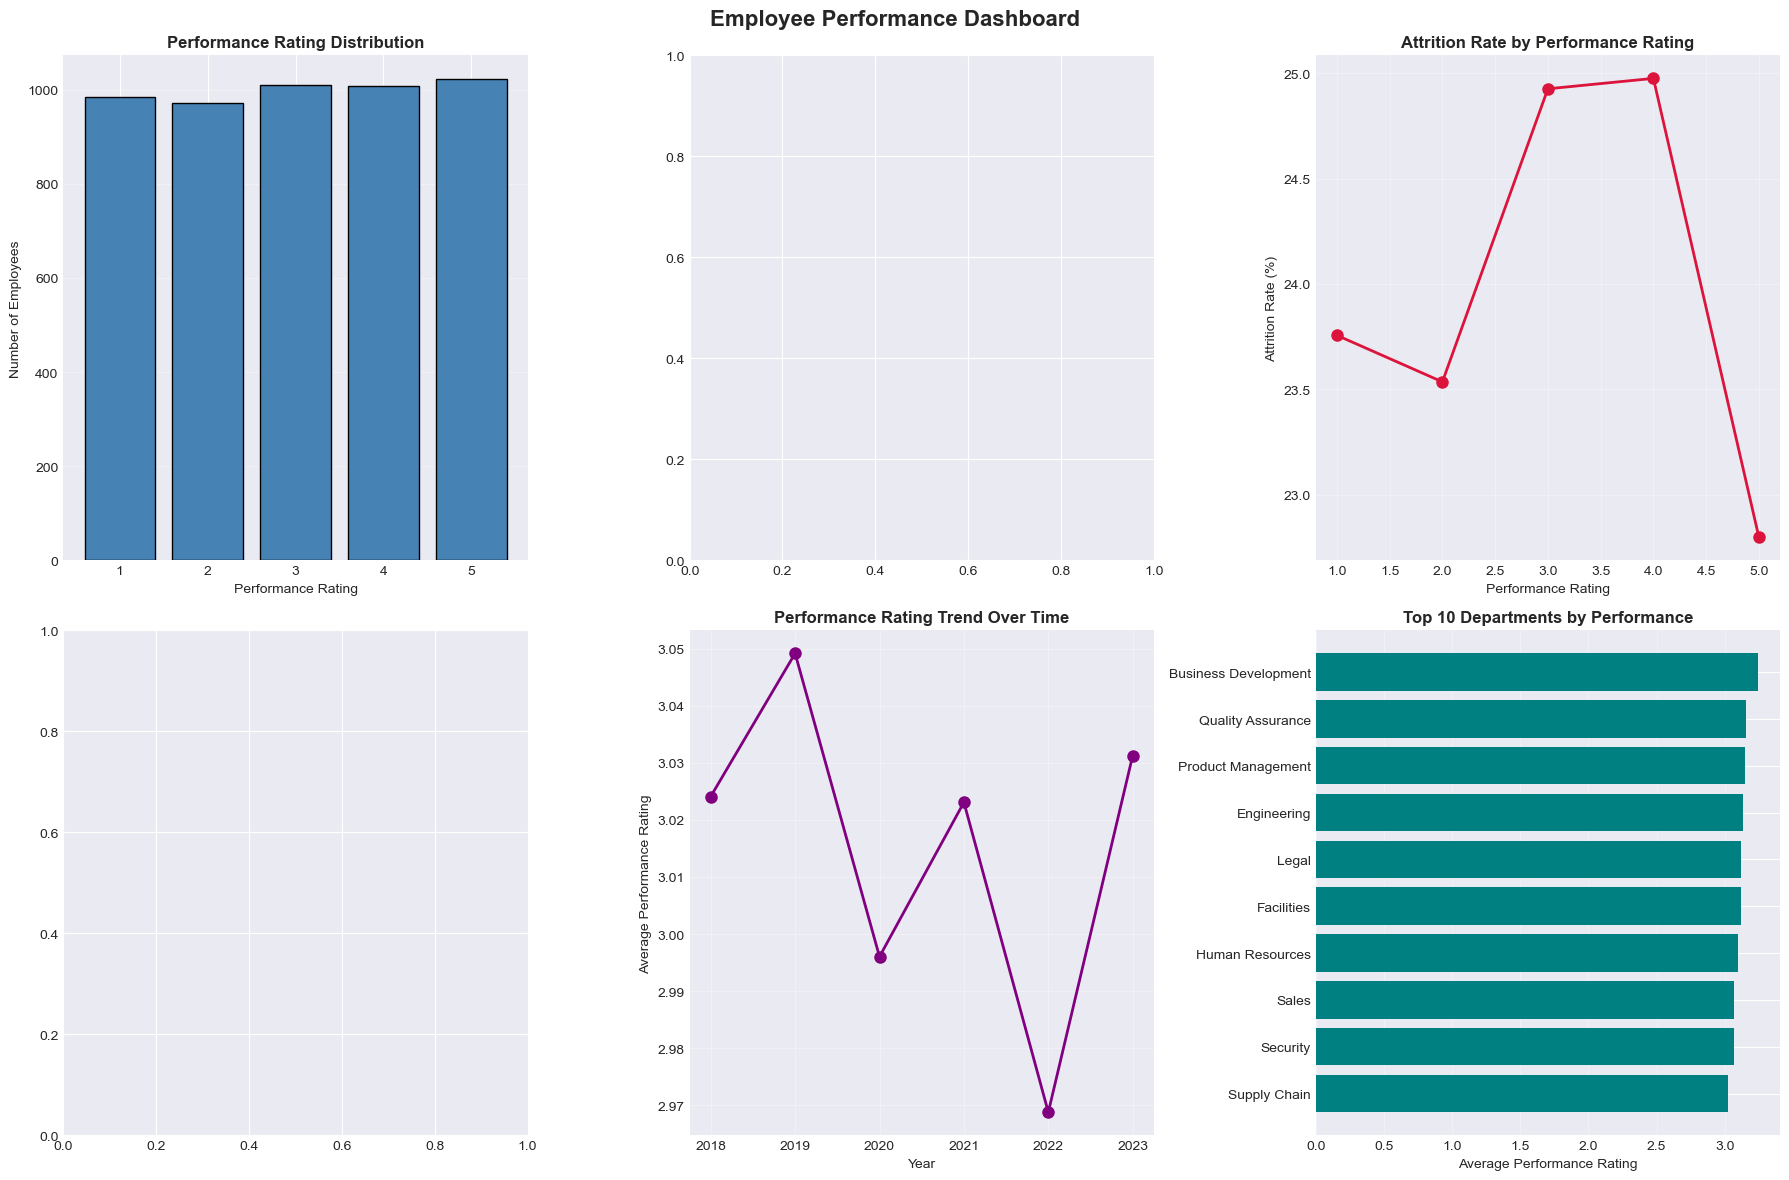

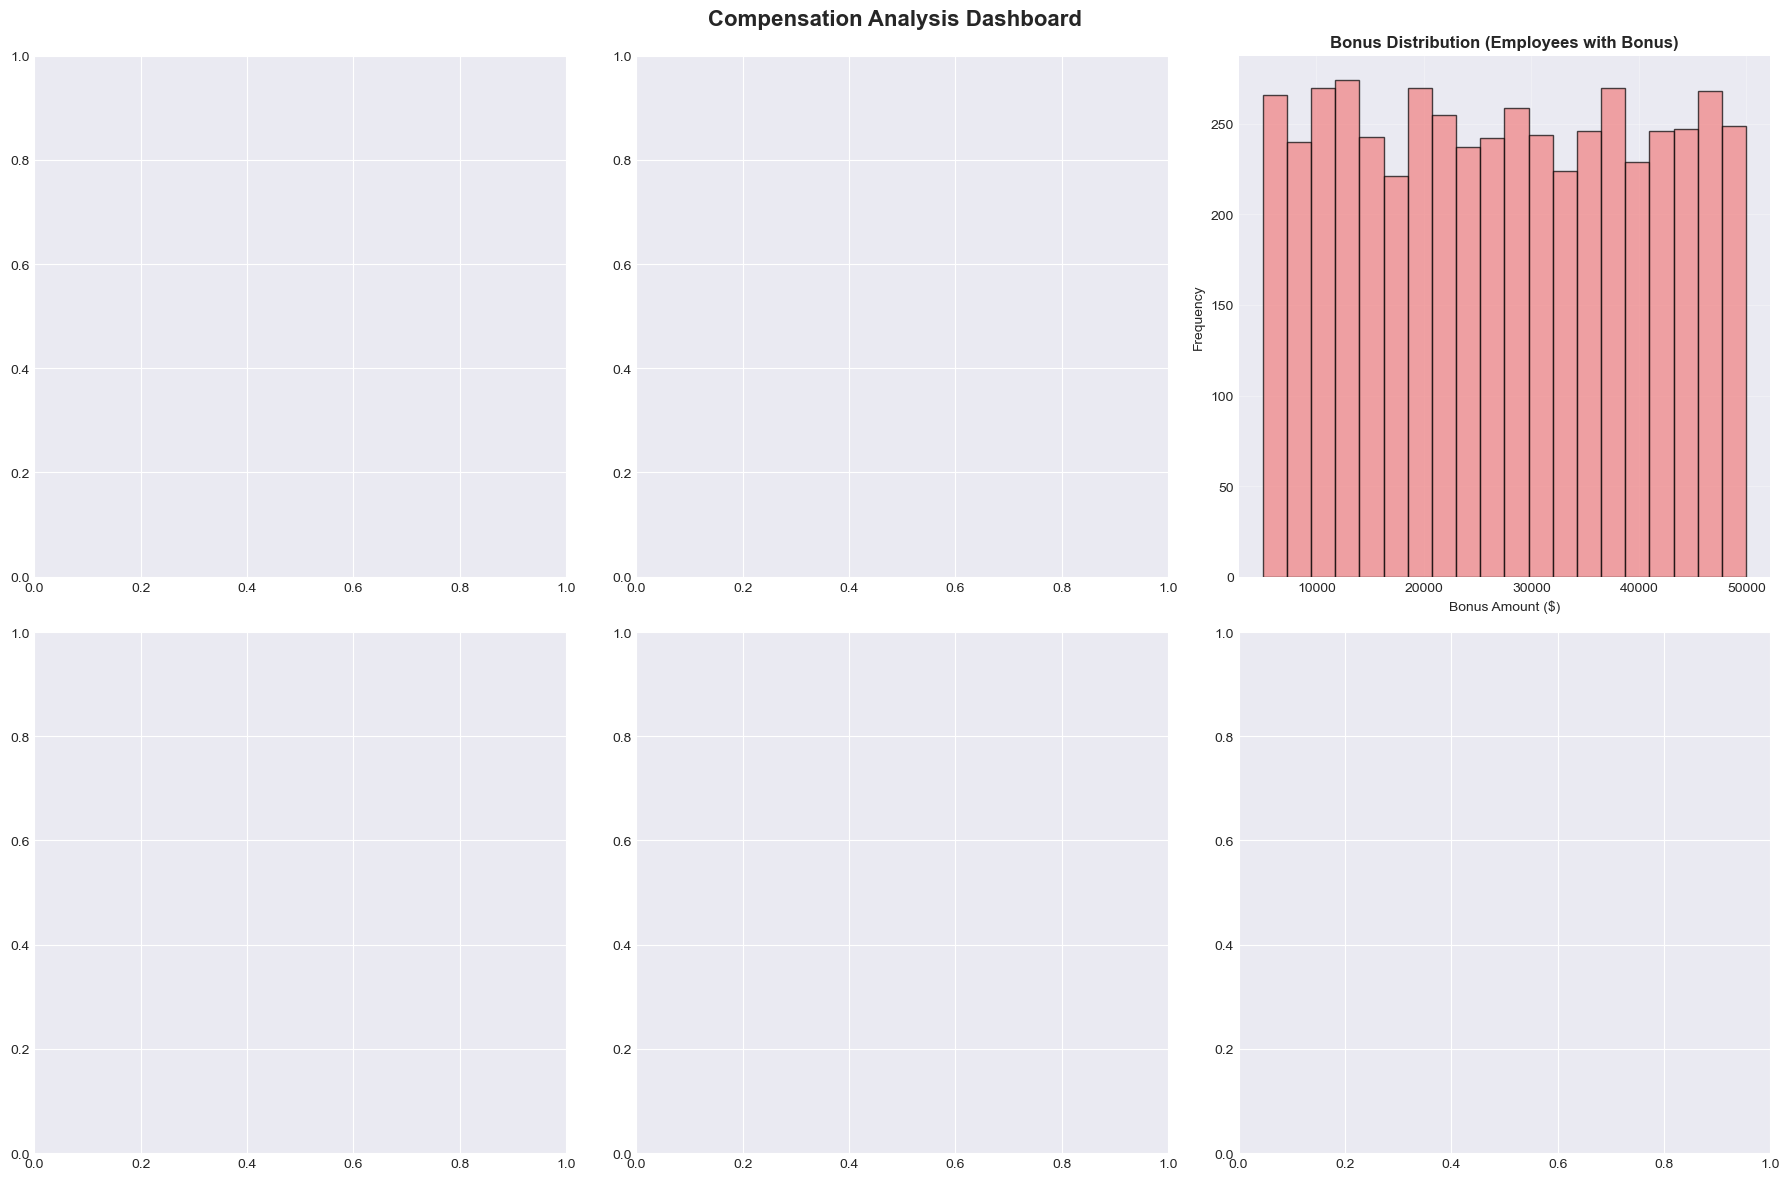

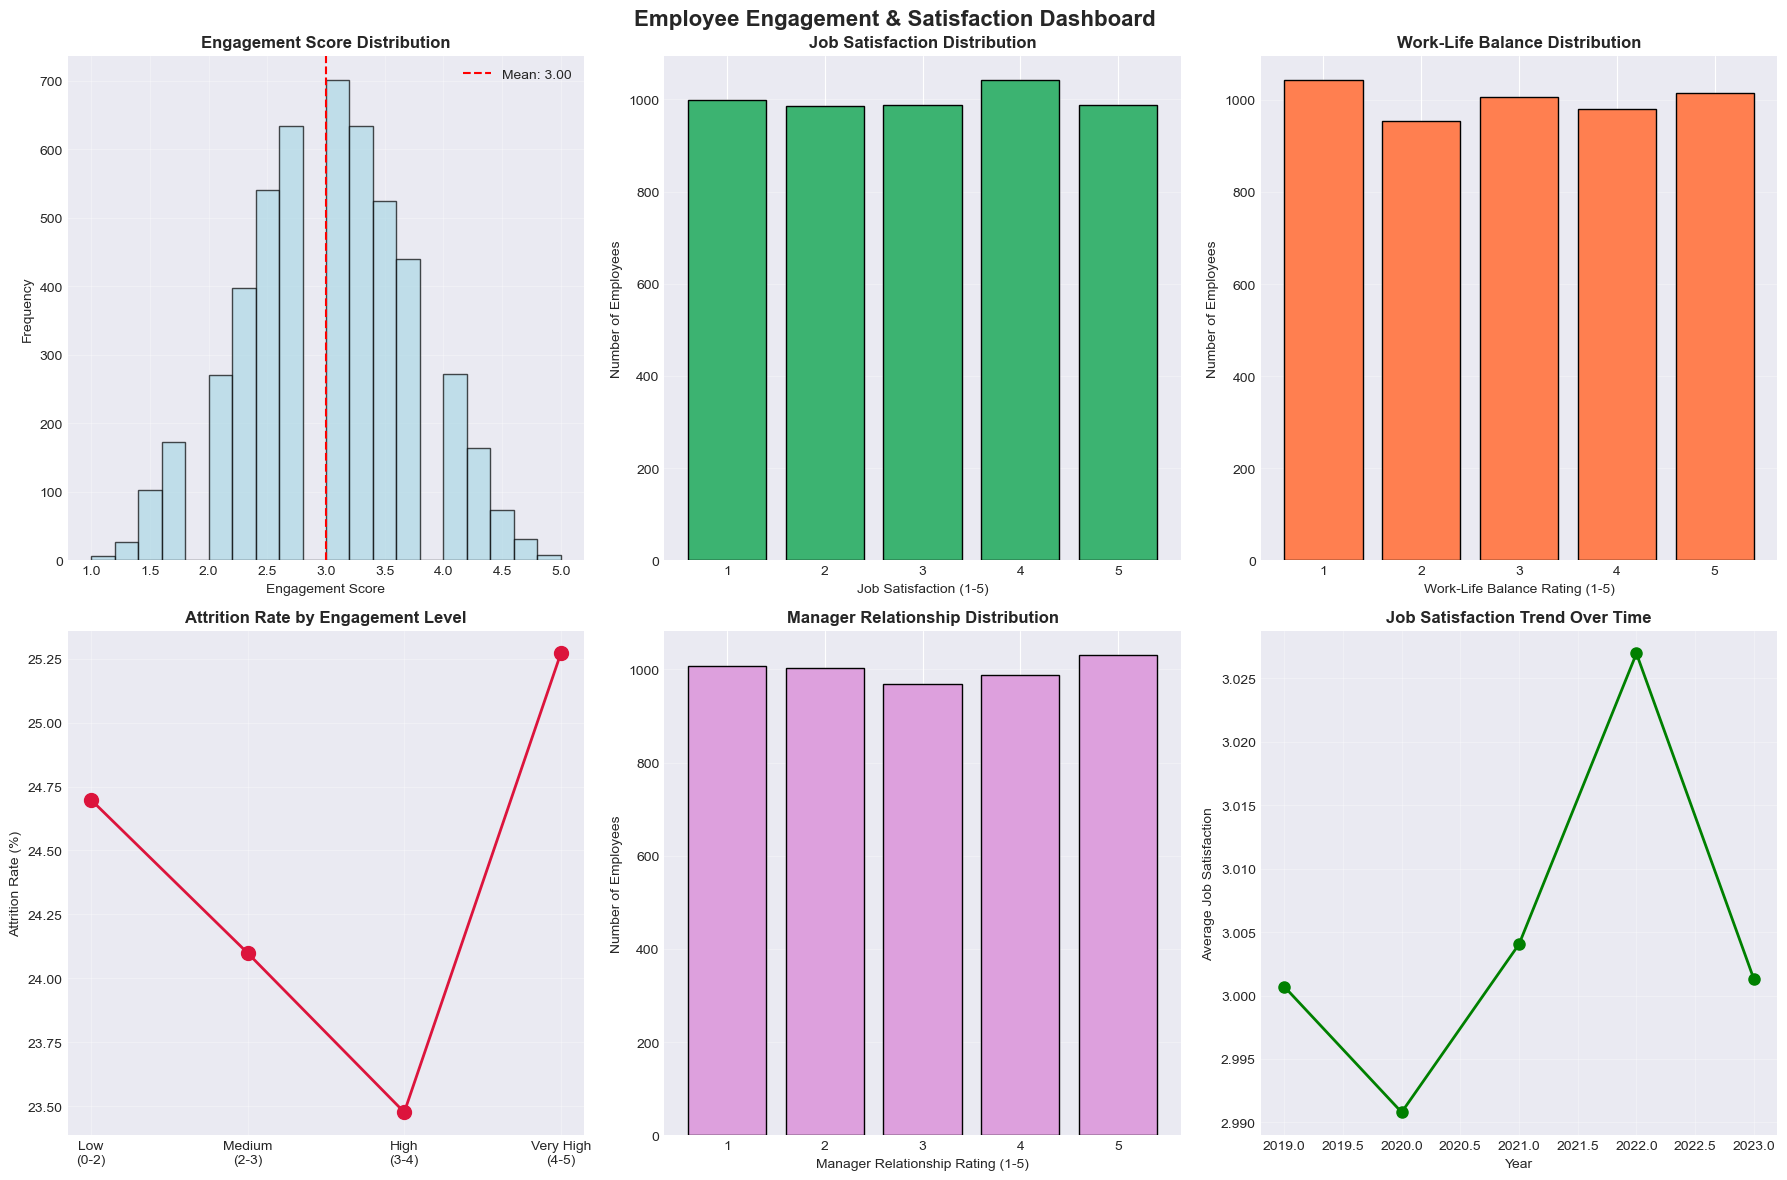

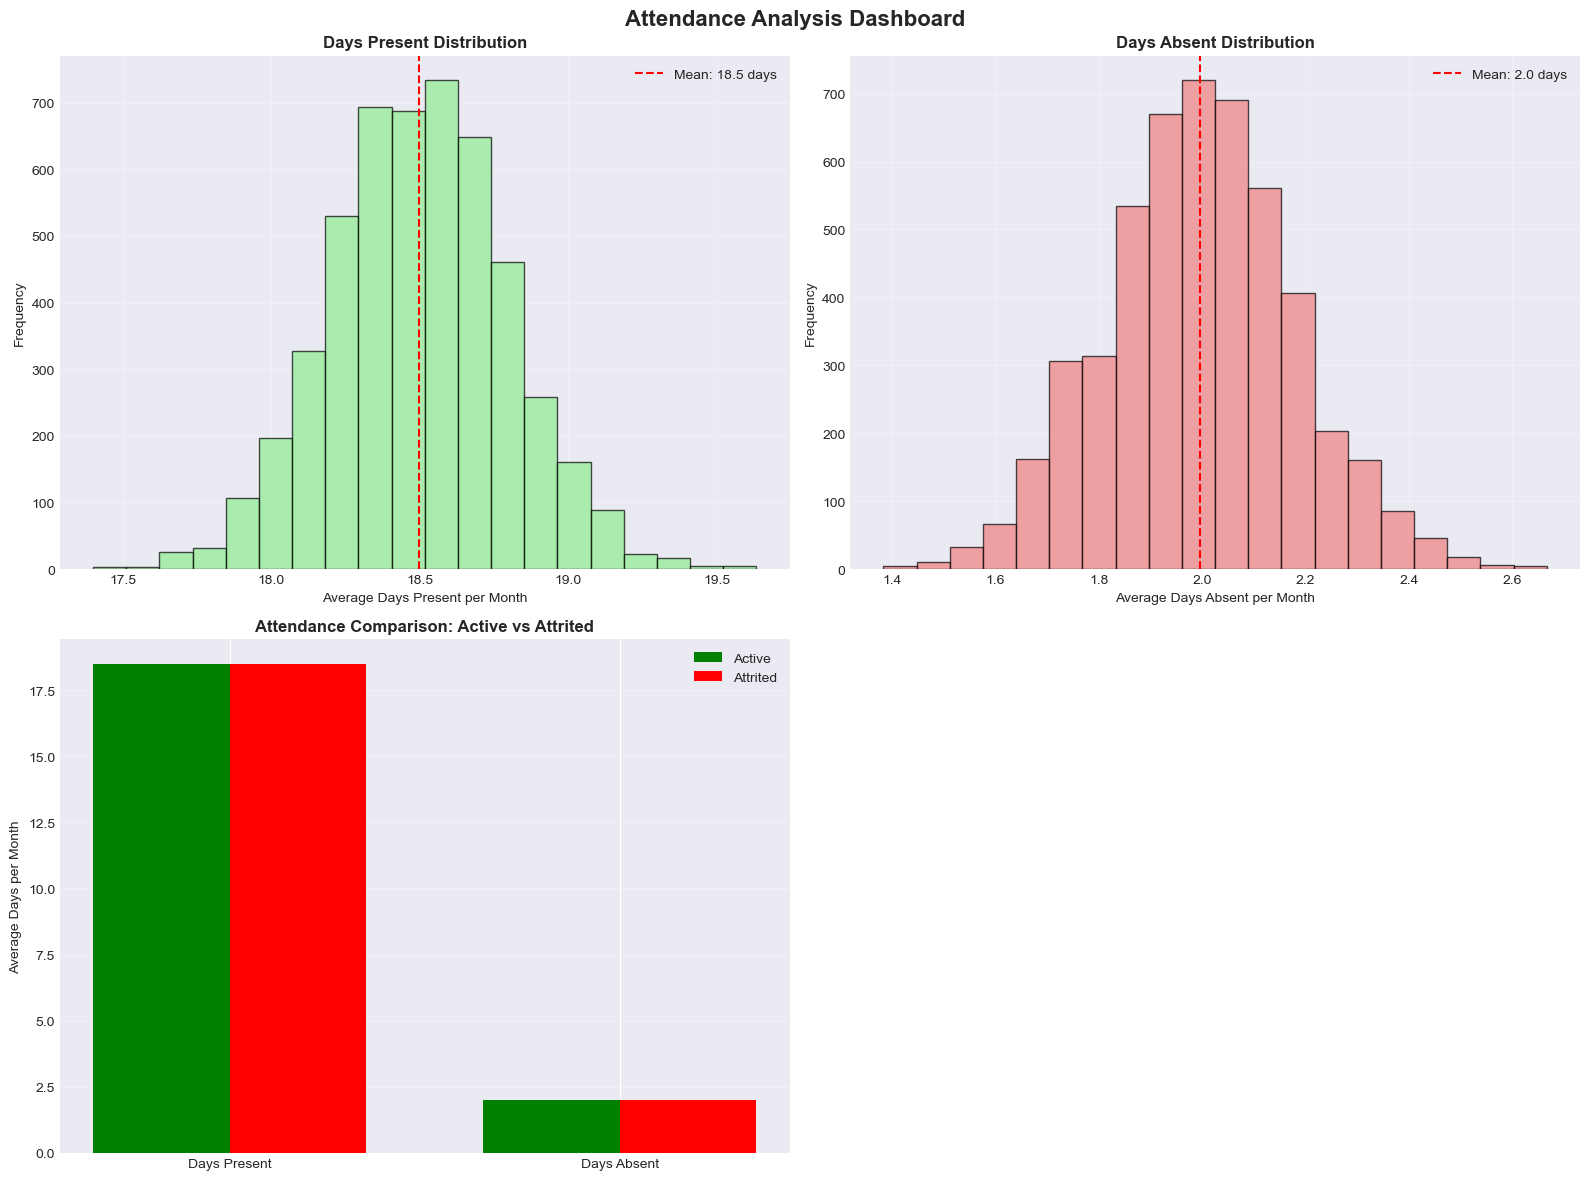

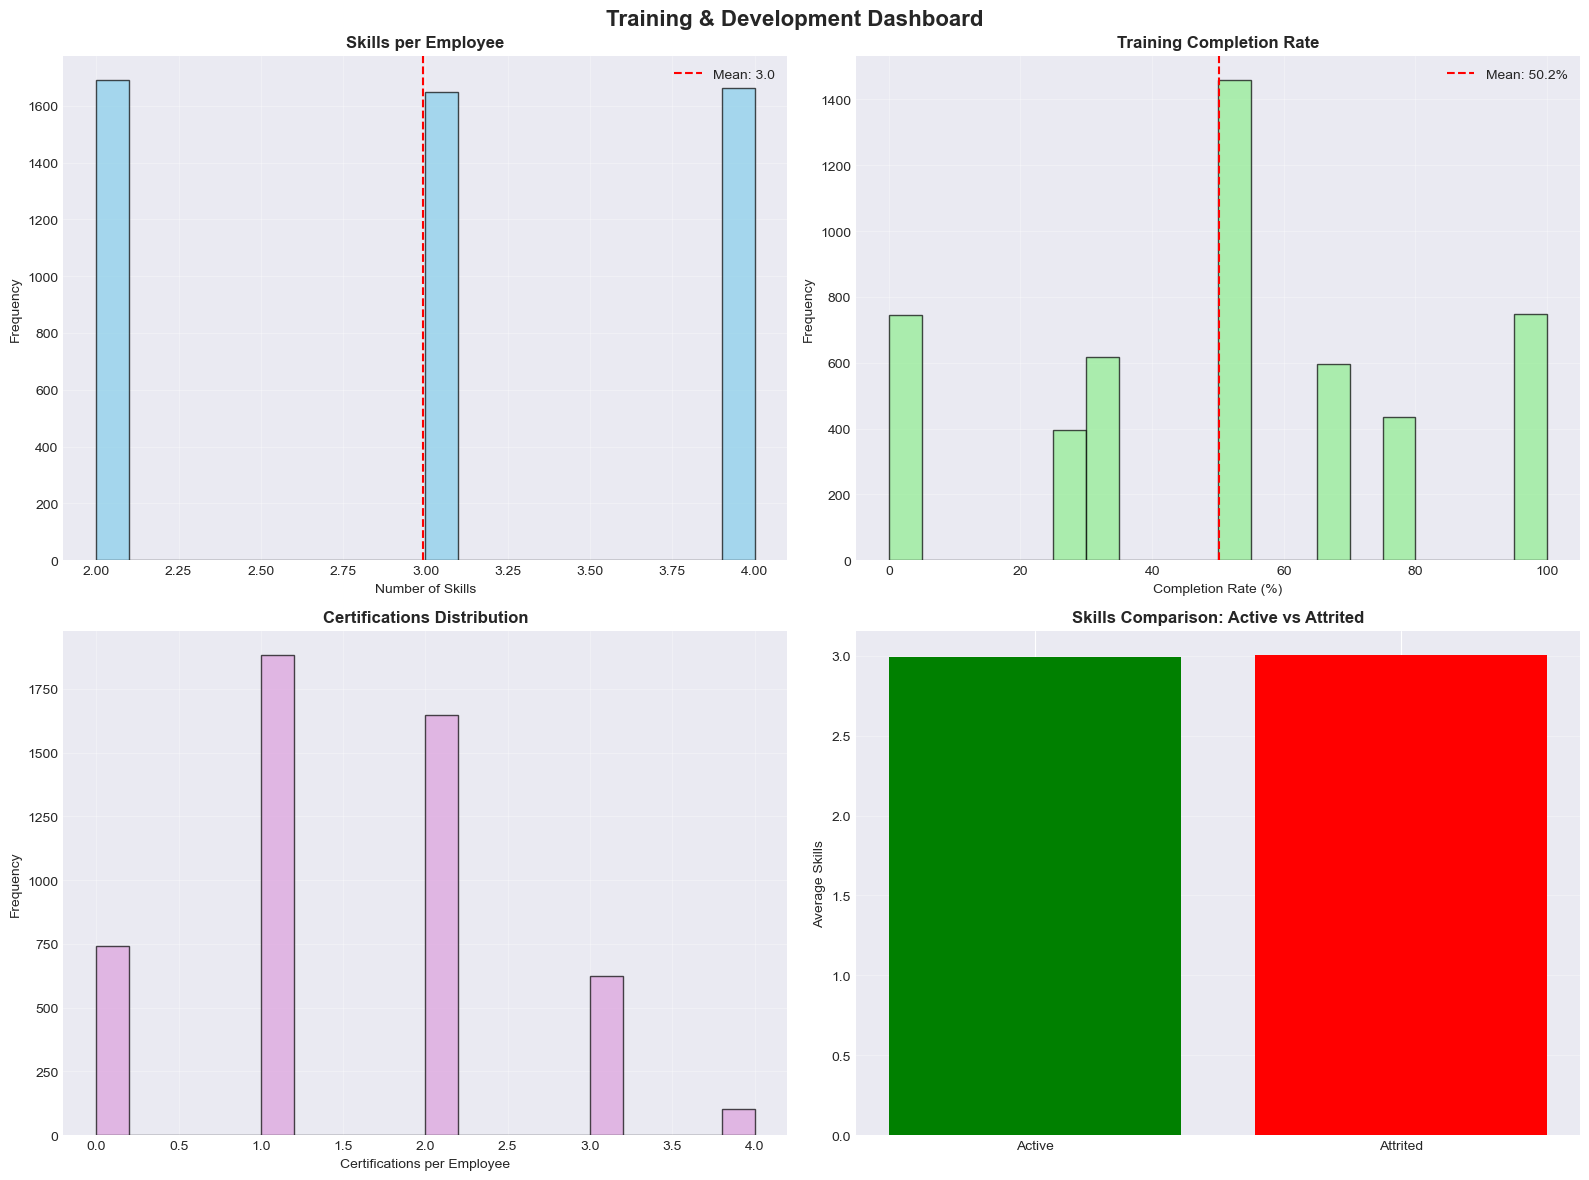

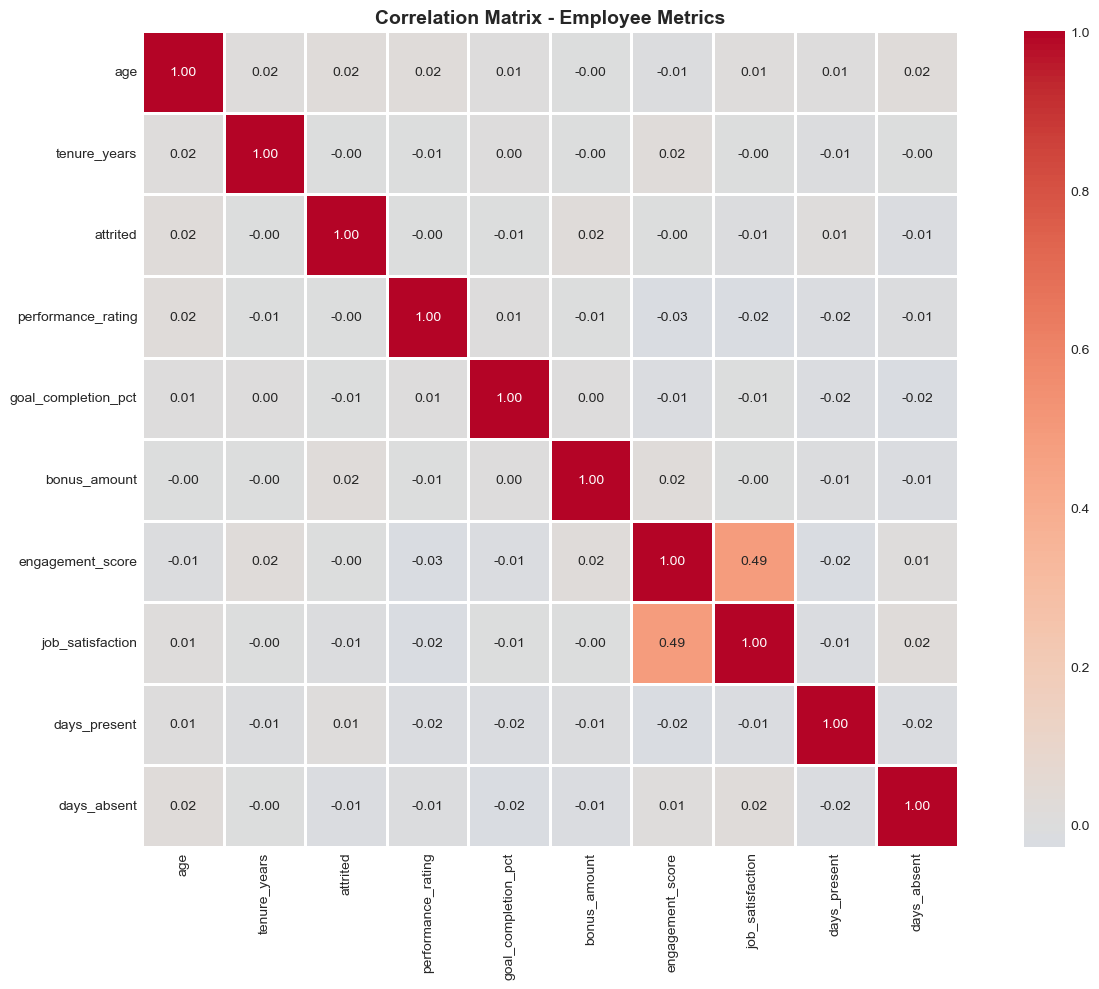

In [87]:
def main():
    """Main execution function"""
    
    print("\n🚀 Starting Comprehensive EDA...")
    print("="*80)
    
    # Load data
    datasets = load_data()
    
    if datasets is None:
        print("\n❌ Cannot proceed without data. Please check file paths.")
        print("\n💡 To use this script with your data:")
        print("   1. Update the data_path in load_data() function")
        print("   2. Ensure all CSV files are in the correct location")
        print("   3. Run the script again")
        return
    
    # Data overview
    metrics = data_overview(datasets)
    
    # Run all analyses
    print("\n🔍 Running Analyses...")
    print("="*80)
    
    emp_with_attrition = analyze_attrition(datasets)
    analyze_demographics(datasets)
    analyze_performance(datasets)
    analyze_compensation(datasets)
    analyze_engagement(datasets)
    analyze_attendance(datasets)
    analyze_training(datasets)
    correlation_analysis(datasets)
    create_interactive_dashboard(datasets)
    generate_executive_summary(datasets, metrics)
    
    print("\n" + "="*80)
    print("✅ EDA COMPLETED SUCCESSFULLY!")
    print("="*80)
    print("\n📁 Output Files Generated:")
    print("   ✓ attrition_analysis_dashboard.png")
    print("   ✓ demographics_dashboard.png")
    print("   ✓ performance_dashboard.png")
    print("   ✓ compensation_dashboard.png")
    print("   ✓ engagement_dashboard.png")
    print("   ✓ attendance_dashboard.png")
    print("   ✓ training_dashboard.png")
    print("   ✓ correlation_heatmap.png")
    print("   ✓ interactive_dashboard.html")
    print("   ✓ executive_summary.txt")
    print("\n🎯 All visualizations saved to /mnt/user-data/outputs/")
    print("="*80)

if __name__ == "__main__":
    main()
